<a href="https://colab.research.google.com/github/Rinianggra22/Klasifikasi-Credit-Approval/blob/main/Klasifikasi_Credit%2BApproval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latar Belakang

SOAL Sebuah Bank memerlukan pendistribusian kredit kepada nasabah agar Bank menjadi untung besar. Salah satu produk bank yang ditawarkan adalah kartu kredit. Kartu kredit jika tidak dipegang oleh nasabah yang tepat, berakibat pada macetnya pembayaran tagihan kartu kredit. Oleh sebab itu Bank memerlukan sebuah cara untuk mendeteksi calon nasabah yang akan diberi persetujuan mendapatkan kartu kredit.

Diantara alternatif solusi yang dikembangkan adalah metode Data Science yang menerapkan sebuah framework yang telah dipergunakan secara luas di dunia industri yaitu CRISP-DM framework. Framework ini selanjutnya diuraikan menjadi sebuah 11 urutan langkah2 antara lain: memahami tujuan bisnis, memahami tujuan teknis data science, memahami dan melakukan proses awal data, membuat skenario pemodelan, membuat model yang handal, mengevaluasi pemodelan, dan mereview proyek data science.

Solusi tersebut digunakan untuk mengidentifikasi factor-faktor yang berkontribusi terhadap persetujuan penerbitan kartu kredit. Hasil prediksi tersebut selanjutnya digunakan oleh bank untuk mencegah macetnya pembayaran tagihan kartu kredit.

Sumber data utama untuk keperluan pengembangan model prediktif ini adalah hasil survey menggunakan data internal bank dengan dataset nasabah yang dikumpulkan selama beberapa tahun terakhir. Dataset tersebut berisi: A1,A2…, A15. Disini A16 merupakan variable dependent nya (label yang dicari). Perlu diperhatikan, nama kolom memang sengaja dihapus agar tidak dapat dibaca oleh orang yang tidak berkepentingan.

Tujuan pemanfaatan metode Data Science yang utama didalam kasus ini adalah menghasilkan model prediktif yang akurat yang dapat dipergunakan untuk: (1) mengidentifikasi variabel kunci yang mempengaruhi persetujuan penerbitan kartu kredit, dan (2) memprediksi persetujuan penerbitan kartu kredit. Dari hasil pemodelan prediktif dengan Data Science diharapkan dapat memberikan masukan kepada pihak bank untuk memberikan persetujuan penerbitan kartu kredit.

Dataset: https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Dengan menggunakan Langkah-langkah pada Associate Data Scientist, selesaikan masalah diatas menggunakan Metode Klasifikasi.

Pengerjaan dilakukan dengan mengirimkan hasil rekaman youtube ke Kulino untuk dinilai.

# Load Library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import confusion_matrix

# Bab 1 Mengumpulkan Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/BigData/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Dataset



In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/BigData/crx.data', header=None)

In [ ]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


### Memasukkan Nama fitur pada Dataset

In [ ]:
dataset.columns=["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15","A16",]

In [ ]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
dataset.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


# Bab 2 Menganalisis Karakter Data

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


**Temuan:** ada beberapa data yang

---

bernilai int64, float64 dan ada yang bernilai Object..dan jumlah records ada 690

### Deskripsi semua Data

In [ ]:
dataset.describe(include="all")

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,690,690,690.000000,690,690,690,690,690.000000,690,690,690.00000,690,690,690,690.000000,690
unique,3,350,NaN,4,4,15,10,NaN,2,2,NaN,2,3,171,NaN,2
top,b,?,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,468,12,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,383
mean,NaN,NaN,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,NaN,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


In [ ]:
dataset.describe()

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [ ]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
dataset.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


**Temuan:** dapat disimpulkan bahwa dari head dan tail, bisa di lihat semua berbentuk angka, namun ada yang bernilai ?, ini yang menyebabkan tipe data menjadi Object, maka diperlukan proses untuk merubah ? menjadi yang dapat dipakai

### Cek Distribusi class

Mengecek bagian distribusi class

In [ ]:
dataset['A16'].value_counts()

-    383
+    307
Name: A16, dtype: int64

**Temuan:** Bahwa terdapat 2 jenis nilai pada class A16, yaitu (+)=setuju dan (-)=menolak

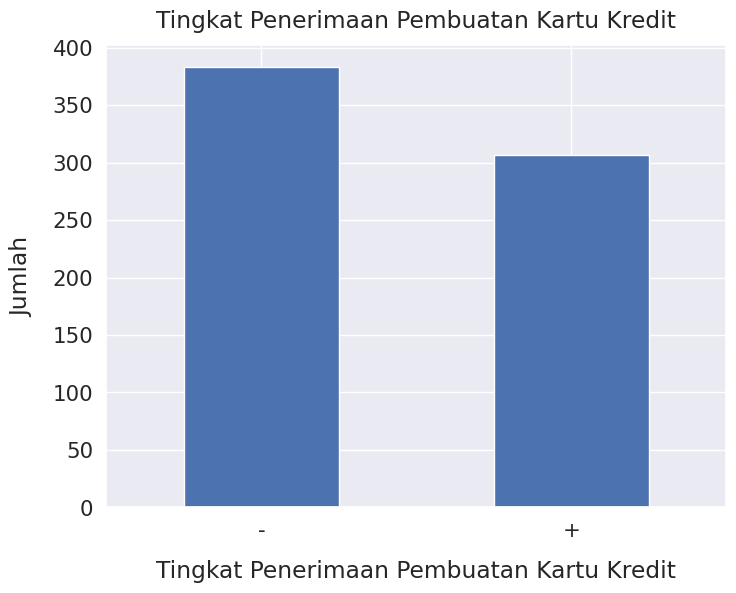

In [ ]:
sns.set(font_scale=1.4)
dataset['A16'].value_counts().plot(kind='bar', figsize=(8, 6), rot=0)
plt.xlabel("Tingkat Penerimaan Pembuatan Kartu Kredit", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Tingkat Penerimaan Pembuatan Kartu Kredit", y=1.02);

**Temuan:** dinyatakan bahwa distribusi class balanced

### Distribusi Fitur A1

In [ ]:
print(dataset['A1'].value_counts())

b    468
a    210
?     12
Name: A1, dtype: int64


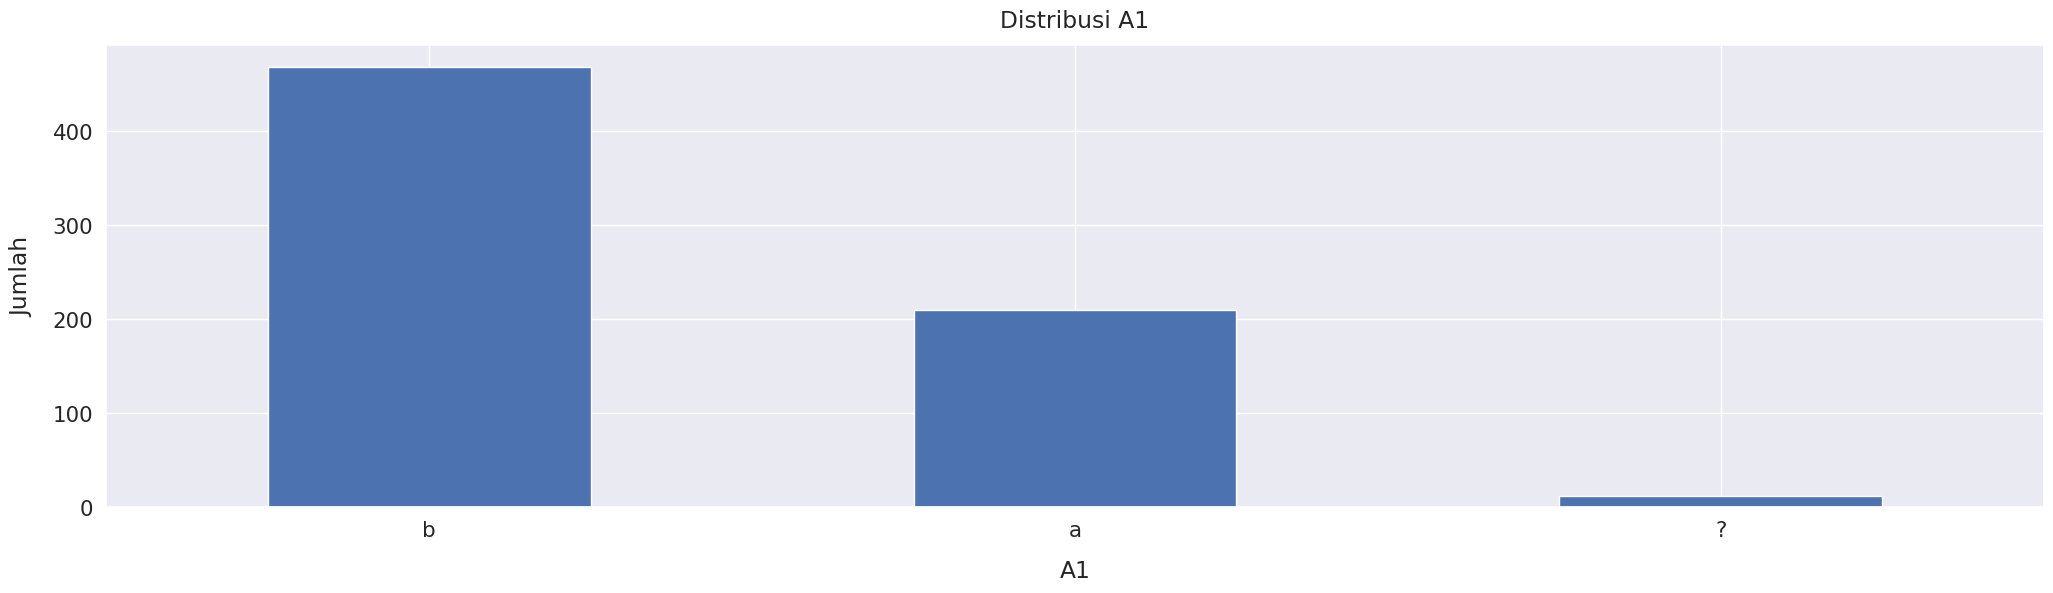

In [ ]:
sns.set(font_scale=1.4)
dataset['A1'].value_counts().plot(kind='bar', figsize=(25, 6), rot=0)
plt.xlabel("A1", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A1", y=1.02);

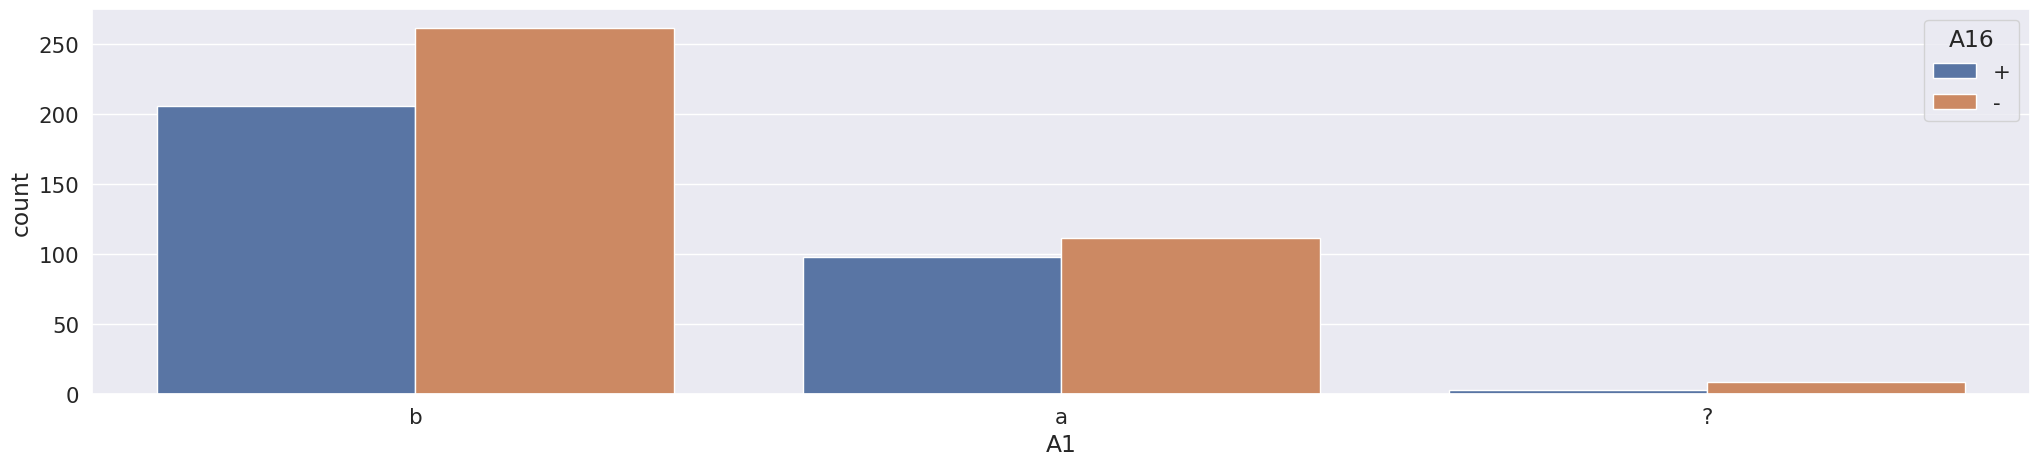

In [ ]:
#Mengkomparasi yang + dengan yang -
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['A1'],order=dataset['A1'].value_counts().index,hue=dataset['A16'])
plt.show()

### Distribusi Fitur A2

In [ ]:
print(dataset['A2'].value_counts())

?        12
22.67     9
20.42     7
18.83     6
24.50     6
         ..
48.25     1
28.33     1
18.75     1
18.50     1
36.42     1
Name: A2, Length: 350, dtype: int64


Text(0.5, 1.02, '')

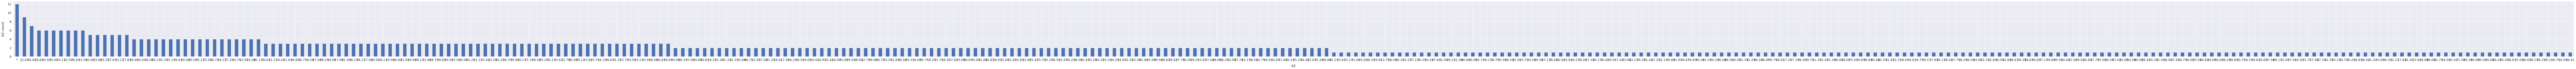

In [ ]:
sns.set(font_scale=1.4)
dataset['A2'].value_counts().plot(kind='bar', figsize=(230, 5), rot=0)
plt.xlabel("A2", labelpad=14)
plt.ylabel("A2 count", labelpad=14)
plt.title("", y=1.02)

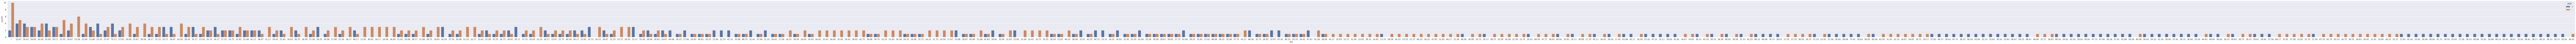

In [ ]:
#Mengkomparasi yang + dengan yang -
plt.subplots(figsize = (350,5))
sns.countplot(x=dataset['A2'],order=dataset['A2'].value_counts().index,hue=dataset['A16'])
plt.show()

### Distribusi Fitur A3

In [ ]:
print(dataset['A3'].value_counts())

1.500     21
0.000     19
3.000     19
2.500     19
0.750     16
          ..
0.085      1
12.250     1
11.045     1
11.125     1
3.375      1
Name: A3, Length: 215, dtype: int64


Text(0.5, 1.02, '')

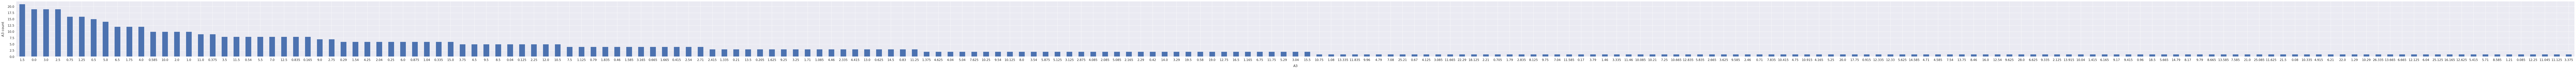

In [ ]:
sns.set(font_scale=1.4)
dataset['A3'].value_counts().plot(kind='bar', figsize=(230, 5), rot=0)
plt.xlabel("A3", labelpad=14)
plt.ylabel("A3 count", labelpad=14)
plt.title("", y=1.02)

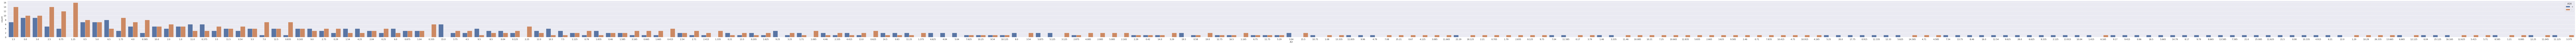

In [ ]:
#Mengkomparasi yang + dengan yang -
plt.subplots(figsize = (350,5))
sns.countplot(x=dataset['A3'],order=dataset['A3'].value_counts().index,hue=dataset['A16'])
plt.show()

### Distribusi Fitur A4

In [ ]:
print(dataset['A4'].value_counts())

u    519
y    163
?      6
l      2
Name: A4, dtype: int64


Text(0.5, 1.02, '')

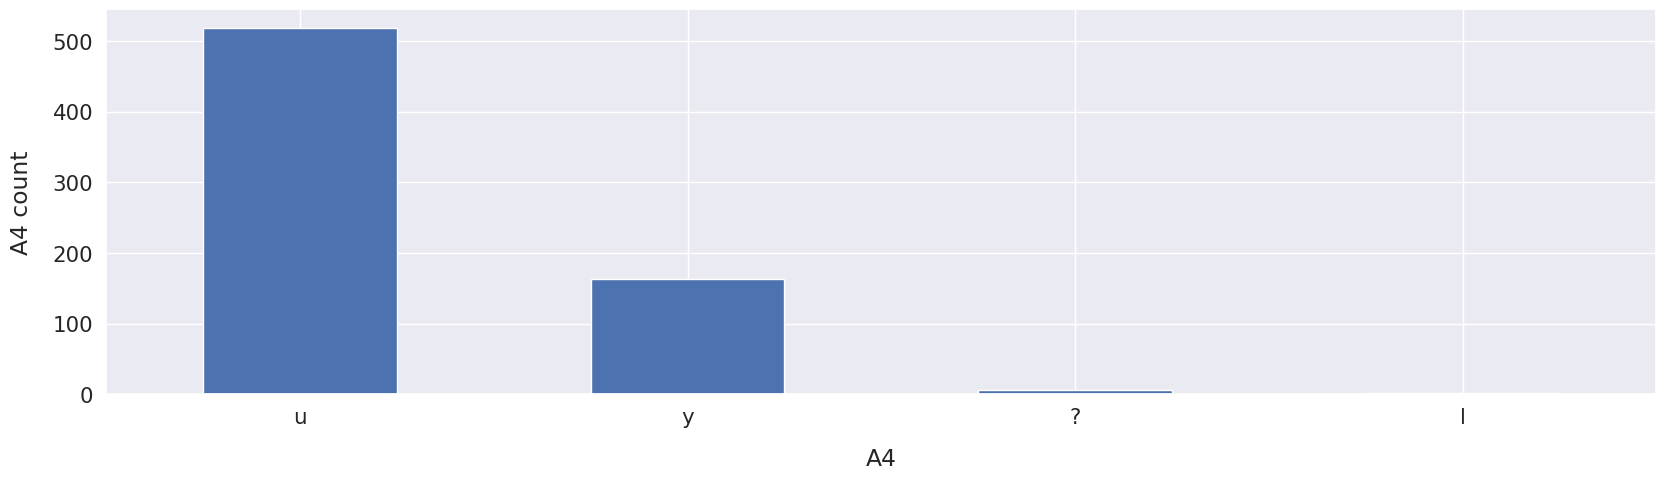

In [ ]:
sns.set(font_scale=1.4)
dataset['A4'].value_counts().plot(kind='bar', figsize=(20, 5), rot=0)
plt.xlabel("A4", labelpad=14)
plt.ylabel("A4 count", labelpad=14)
plt.title("", y=1.02)

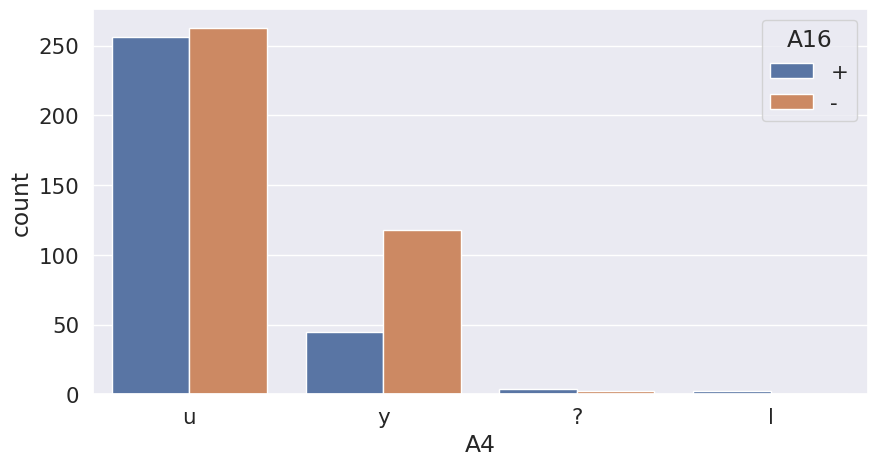

In [ ]:
#Mengkomparasi yang + dengan yang -
plt.subplots(figsize = (10,5))
sns.countplot(x=dataset['A4'],order=dataset['A4'].value_counts().index,hue=dataset['A16'])
plt.show()

### Distribusi Fitur A5

In [ ]:
print(dataset['A5'].value_counts())


g     519
p     163
?       6
gg      2
Name: A5, dtype: int64


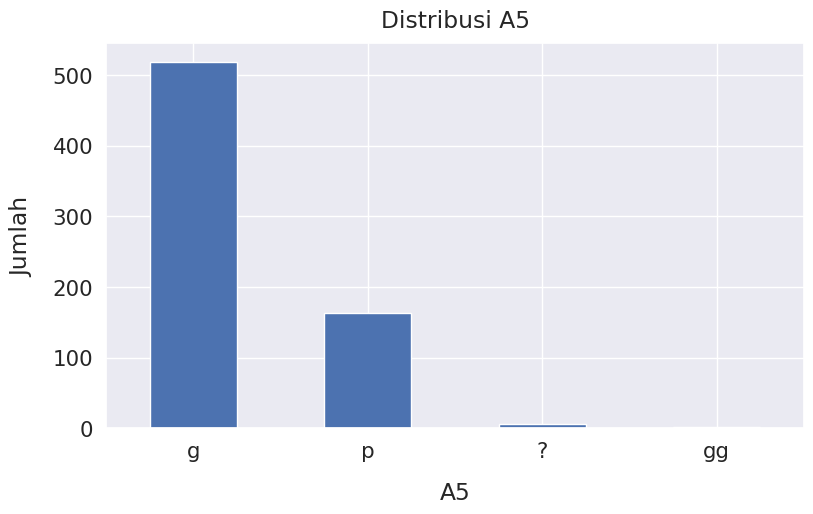

In [ ]:
sns.set(font_scale=1.4)
dataset['A5'].value_counts().plot(kind='bar', figsize=(9, 5), rot=0)
plt.xlabel("A5", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A5", y=1.02);


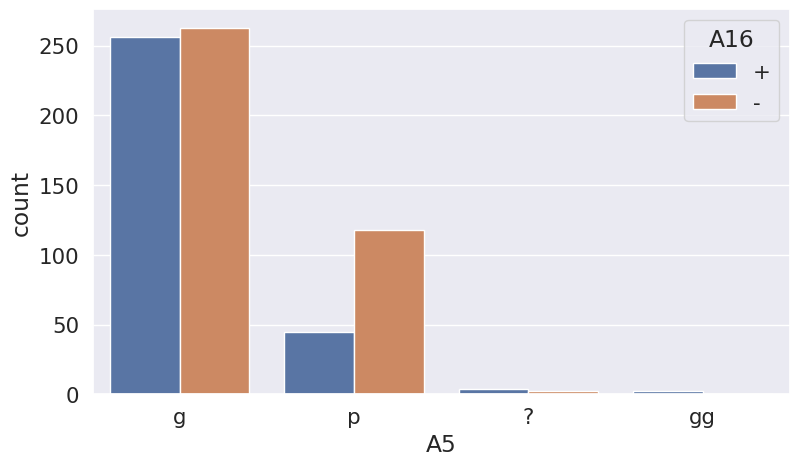

In [ ]:
#Mengkomparasi yang + dengan yang -
plt.subplots(figsize = (9,5))
sns.countplot(x=dataset['A5'],order=dataset['A5'].value_counts().index,hue=dataset['A16'])
plt.show()

### Distribusi Fitur A6

In [ ]:
print(dataset['A6'].value_counts())


c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
?       9
r       3
Name: A6, dtype: int64


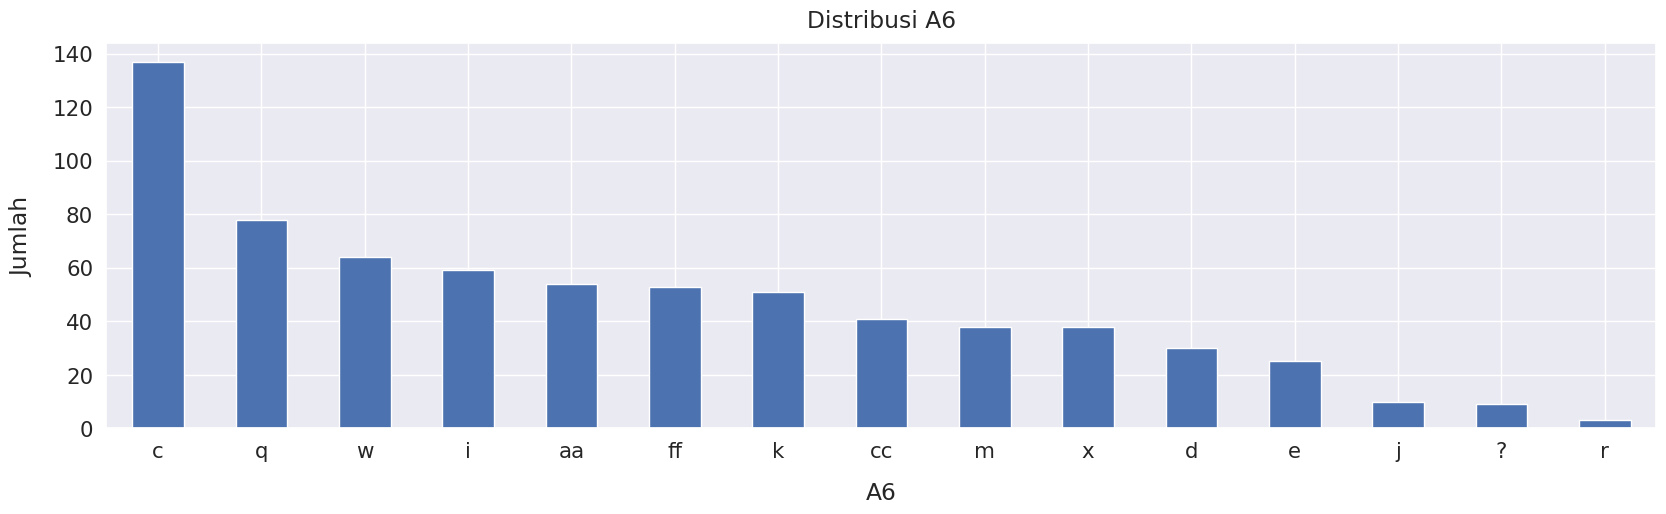

In [ ]:
sns.set(font_scale=1.4)
dataset['A6'].value_counts().plot(kind='bar', figsize=(20, 5), rot=0)
plt.xlabel("A6", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A6", y=1.02);

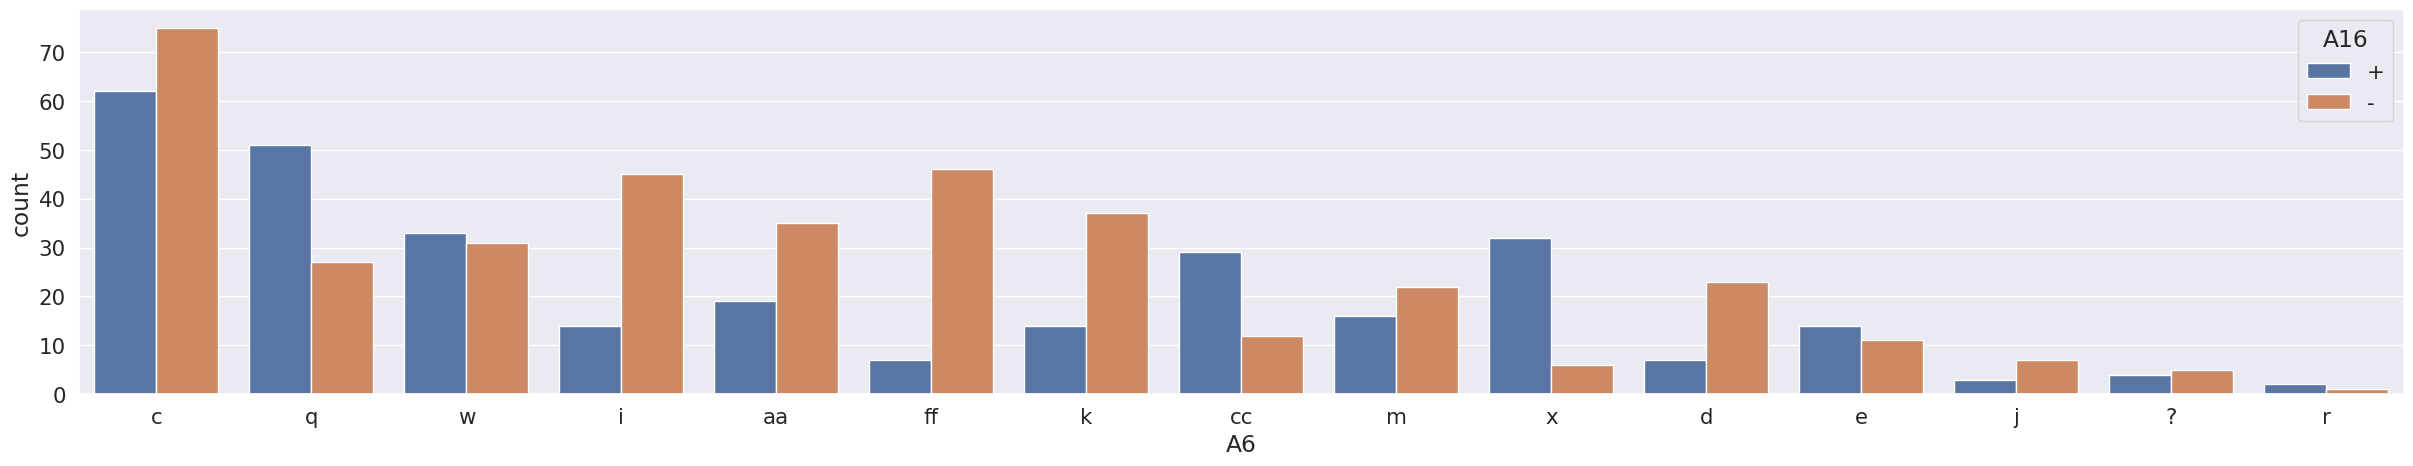

In [ ]:
#Mengkomparasi yang + dengan yang -
plt.subplots(figsize = (30,5))
sns.countplot(x=dataset['A6'],order=dataset['A6'].value_counts().index,hue=dataset['A16'])
plt.show()

### Distribusi Fitur A7

In [ ]:
print(dataset['A7'].value_counts())

v     399
h     138
bb     59
ff     57
?       9
j       8
z       8
dd      6
n       4
o       2
Name: A7, dtype: int64


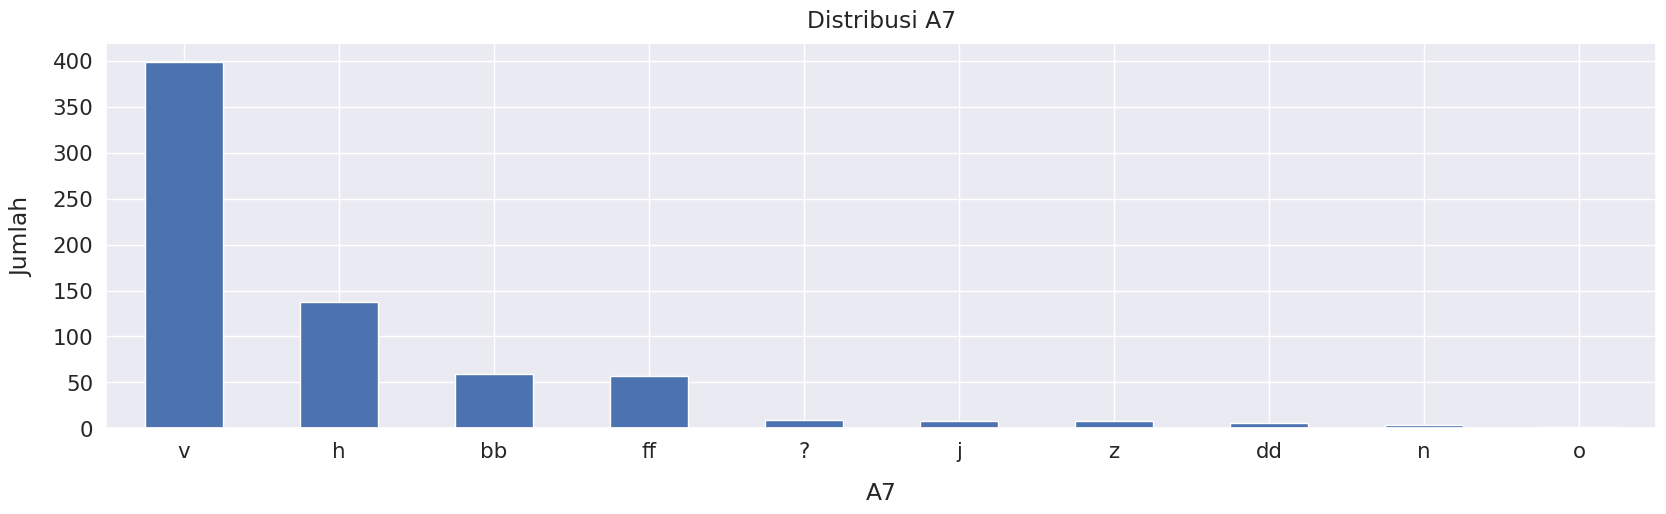

In [ ]:
sns.set(font_scale=1.4)
dataset['A7'].value_counts().plot(kind='bar', figsize=(20, 5), rot=0)
plt.xlabel("A7", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A7", y=1.02);

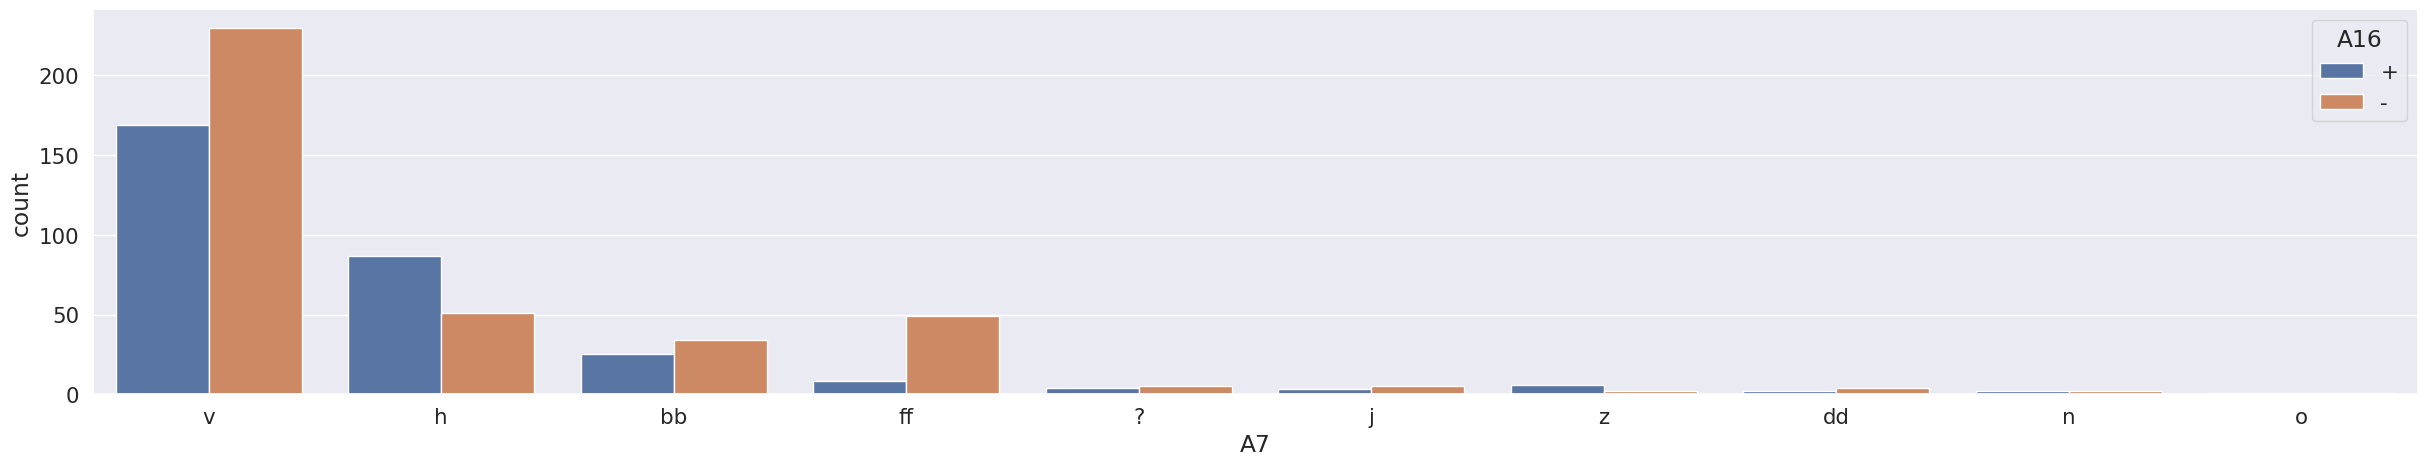

In [ ]:
#Mengkomparasi yang + dengan yang -
plt.subplots(figsize = (30,5))
sns.countplot(x=dataset['A7'],order=dataset['A7'].value_counts().index,hue=dataset['A16'])
plt.show()

### Distribusi Fitur A8

In [ ]:
print(dataset['A8'].value_counts())

0.000    70
0.250    35
0.040    33
1.000    31
0.125    30
         ..
4.165     1
9.000     1
1.960     1
5.125     1
8.290     1
Name: A8, Length: 132, dtype: int64


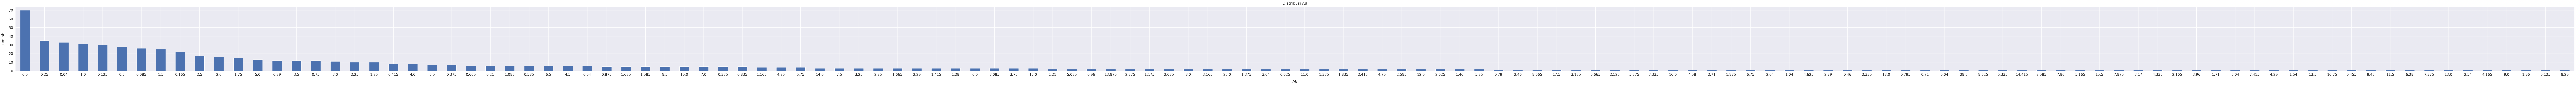

In [ ]:
sns.set(font_scale=1.4)
dataset['A8'].value_counts().plot(kind='bar', figsize=(200, 5), rot=0)
plt.xlabel("A8", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A8", y=1.02);

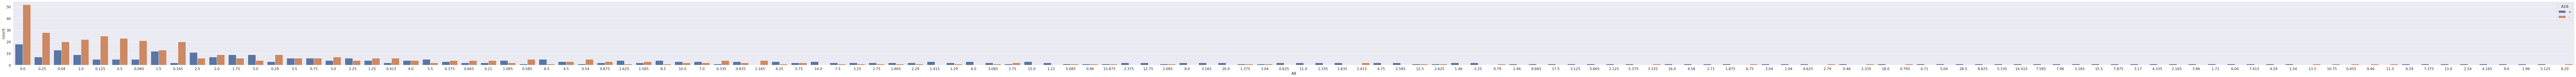

In [ ]:
#Mengkomparasi yang + dengan yang -
plt.subplots(figsize = (200,5))
sns.countplot(x=dataset['A8'],order=dataset['A8'].value_counts().index,hue=dataset['A16'])
plt.show()

### Distribusi Fitur A9

In [ ]:
print(dataset['A9'].value_counts())


t    361
f    329
Name: A9, dtype: int64


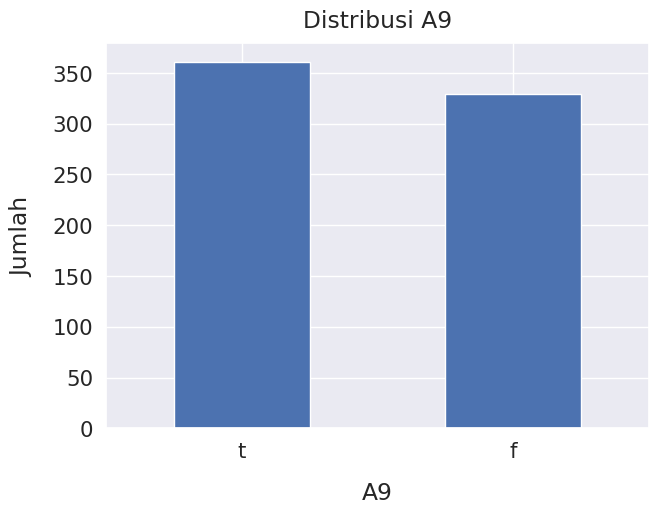

In [ ]:
sns.set(font_scale=1.4)
dataset['A9'].value_counts().plot(kind='bar', figsize=(7, 5), rot=0)
plt.xlabel("A9", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A9", y=1.02);

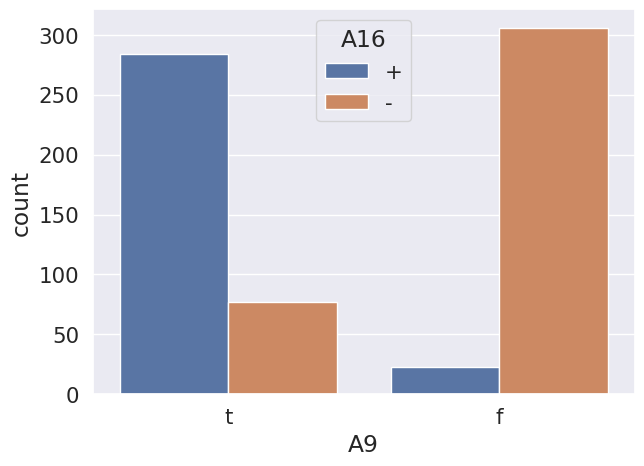

In [ ]:
#Mengkomparasi yang + dengan yang -
plt.subplots(figsize = (7,5))
sns.countplot(x=dataset['A9'],order=dataset['A9'].value_counts().index,hue=dataset['A16'])
plt.show()

### Distribusi Fitur A10

In [ ]:
print(dataset['A10'].value_counts())

f    395
t    295
Name: A10, dtype: int64


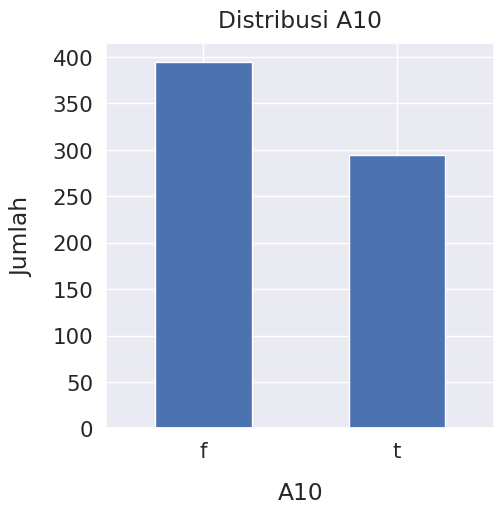

In [ ]:
sns.set(font_scale=1.4)
dataset['A10'].value_counts().plot(kind='bar', figsize=(5, 5), rot=0)
plt.xlabel("A10", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A10", y=1.02);

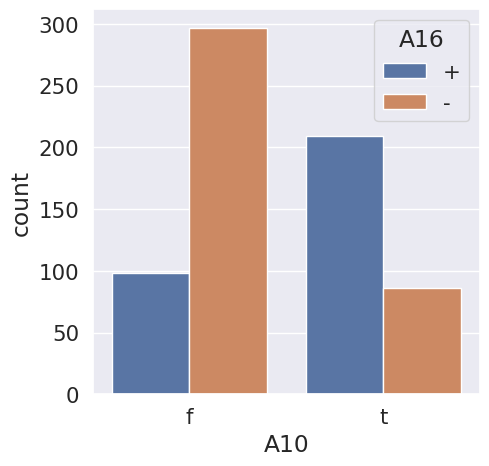

In [ ]:
#Mengkomparasi yang + dengan yang -
plt.subplots(figsize = (5,5))
sns.countplot(x=dataset['A10'],order=dataset['A10'].value_counts().index,hue=dataset['A16'])
plt.show()

### Distribusi Fitur A11

In [ ]:
print(dataset['A11'].value_counts())

0     395
1      71
2      45
3      28
6      23
     ... 
23      1
40      1
67      1
13      1
19      1
Name: A11, Length: 23, dtype: int64


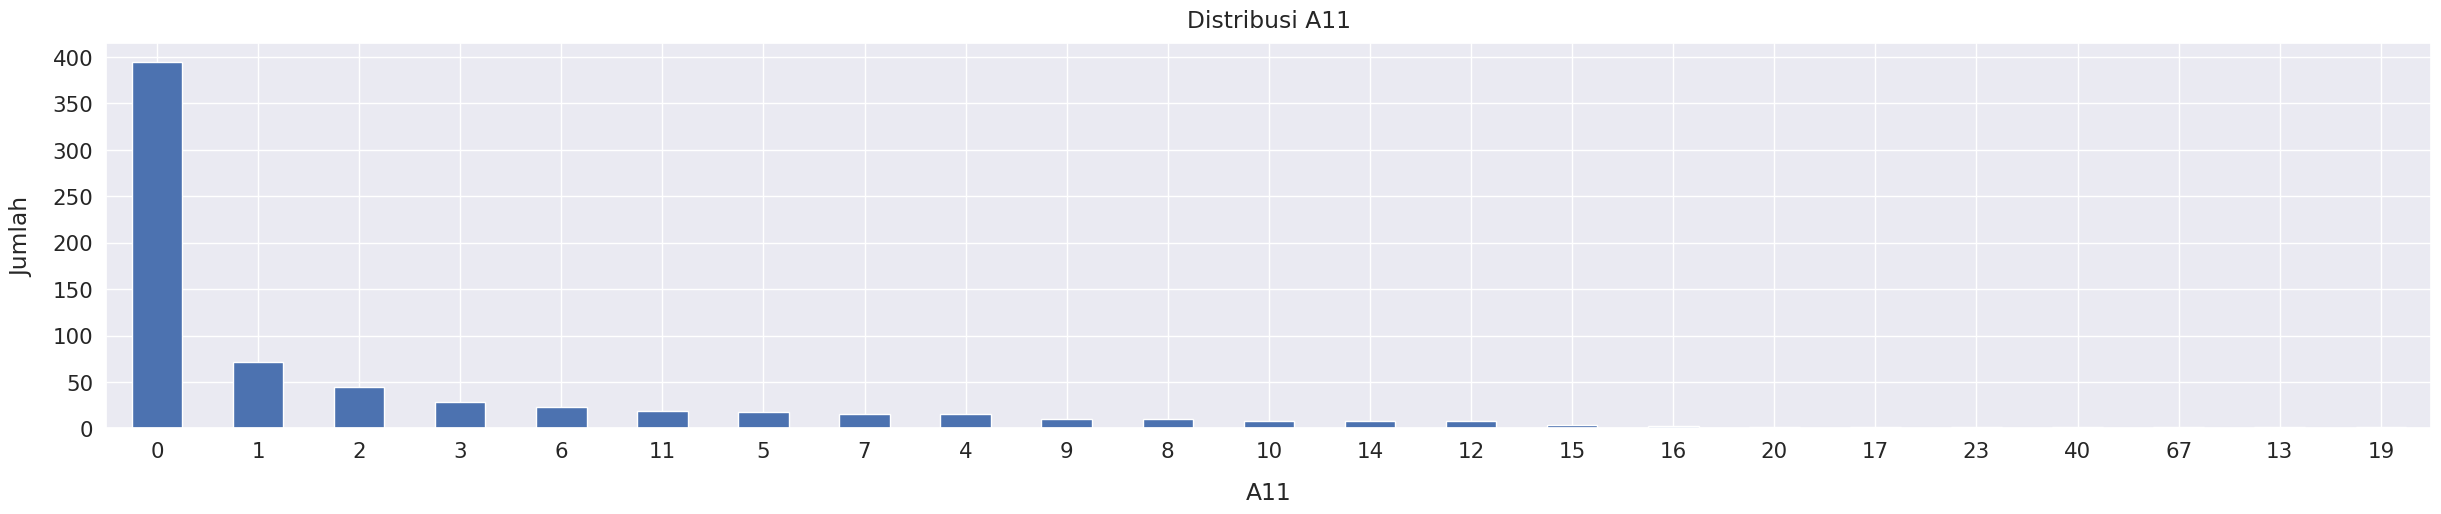

In [ ]:
sns.set(font_scale=1.4)
dataset['A11'].value_counts().plot(kind='bar', figsize=(30, 5), rot=0)
plt.xlabel("A11", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A11", y=1.02);

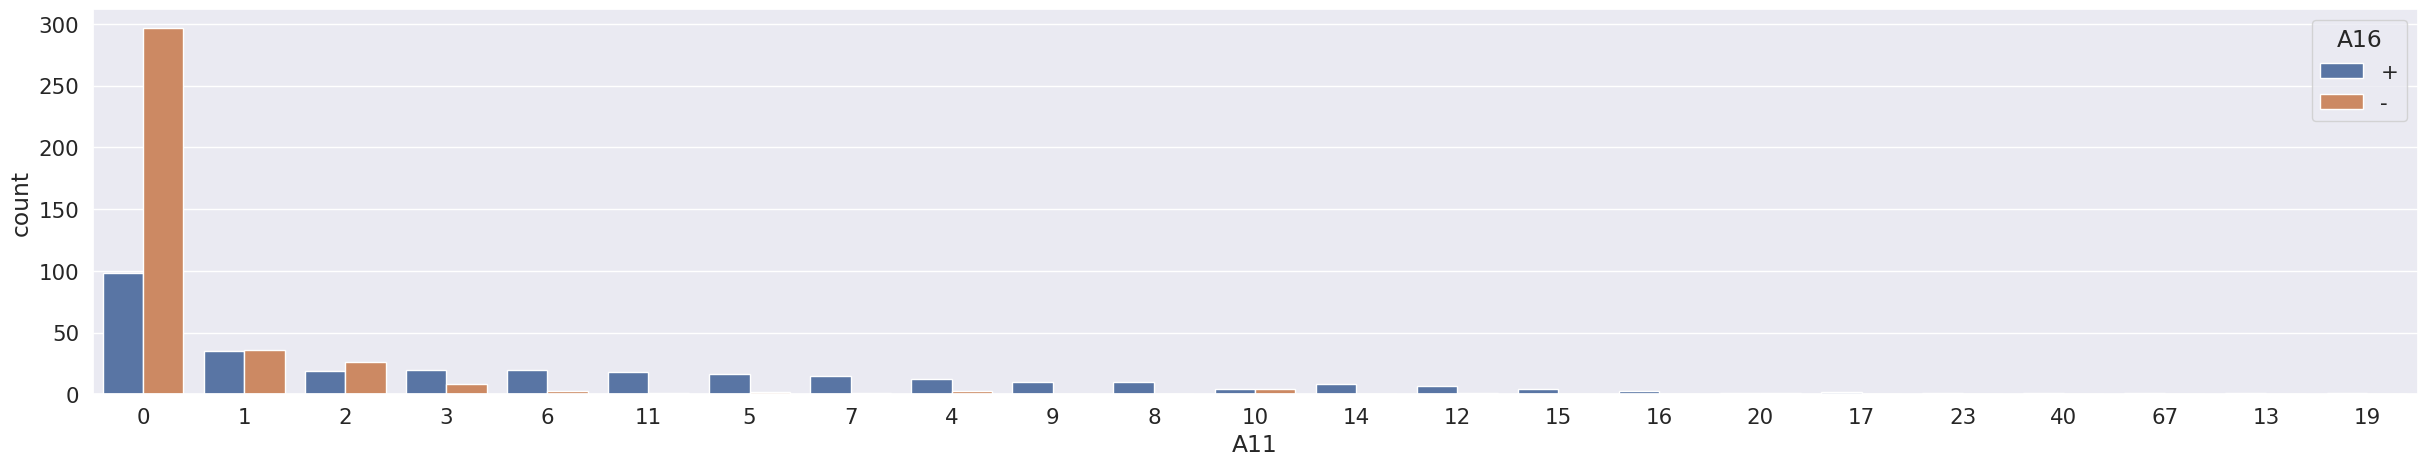

In [ ]:
#Mengkomparasi yang + dengan yang -
plt.subplots(figsize = (30,5))
sns.countplot(x=dataset['A11'],order=dataset['A11'].value_counts().index,hue=dataset['A16'])
plt.show()

### Distribusi Fitur A12

In [ ]:
print(dataset['A12'].value_counts())


f    374
t    316
Name: A12, dtype: int64


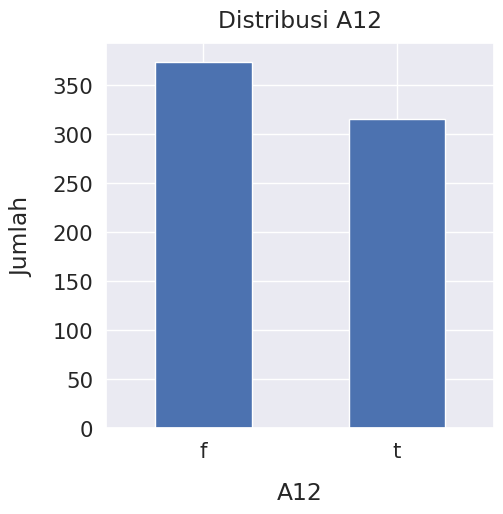

In [ ]:
sns.set(font_scale=1.4)
dataset['A12'].value_counts().plot(kind='bar', figsize=(5, 5), rot=0)
plt.xlabel("A12", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A12", y=1.02);

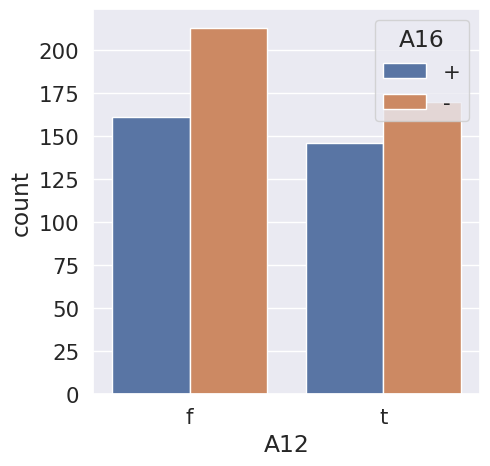

In [ ]:
#Mengkomparasi yang + dengan yang -
plt.subplots(figsize = (5,5))
sns.countplot(x=dataset['A12'],order=dataset['A12'].value_counts().index,hue=dataset['A16'])
plt.show()

### Distribusi Fitur A13

In [ ]:
print(dataset['A13'].value_counts())

g    625
s     57
p      8
Name: A13, dtype: int64


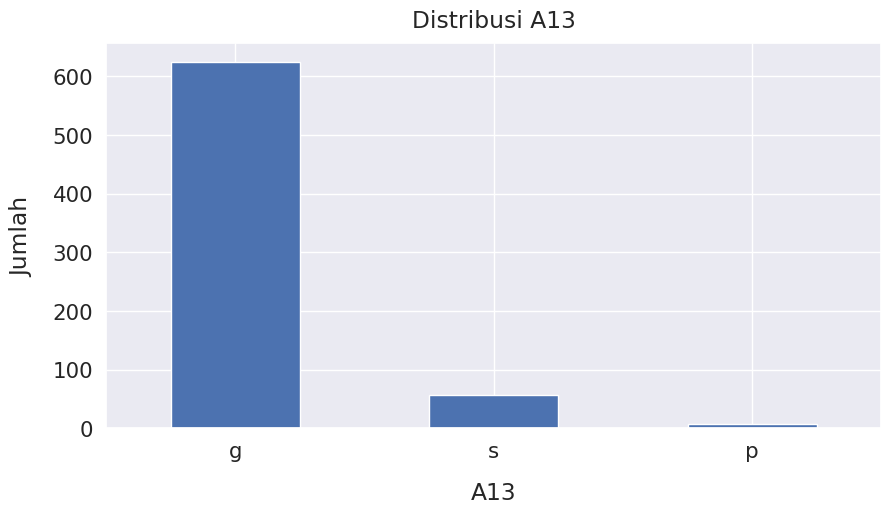

In [ ]:
sns.set(font_scale=1.4)
dataset['A13'].value_counts().plot(kind='bar', figsize=(10, 5), rot=0)
plt.xlabel("A13", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A13", y=1.02);


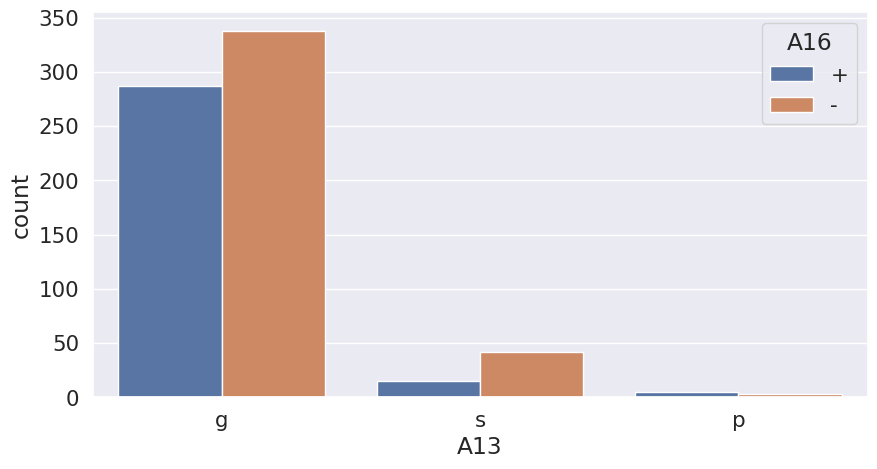

In [ ]:
#Mengkomparasi yang + dengan yang -
plt.subplots(figsize = (10,5))
sns.countplot(x=dataset['A13'],order=dataset['A13'].value_counts().index,hue=dataset['A16'])
plt.show()

### Distribusi Fitur A14

In [ ]:
print(dataset['A14'].value_counts())

00000    132
00200     35
00120     35
00160     34
00100     30
        ... 
00021      1
00393      1
00395      1
00093      1
00256      1
Name: A14, Length: 171, dtype: int64


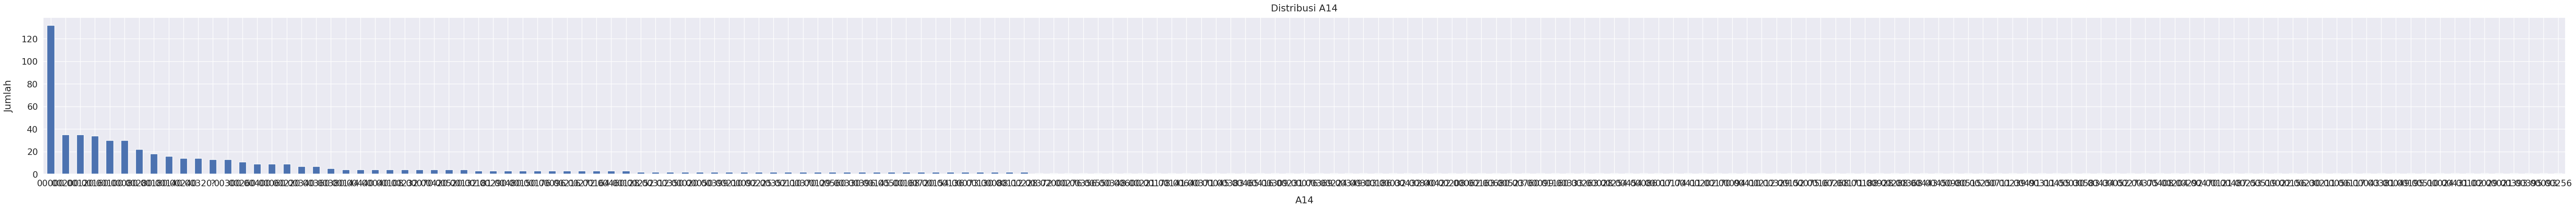

In [ ]:
sns.set(font_scale=1.4)
dataset['A14'].value_counts().plot(kind='bar', figsize=(80, 5), rot=0)
plt.xlabel("A14", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A14", y=1.02);

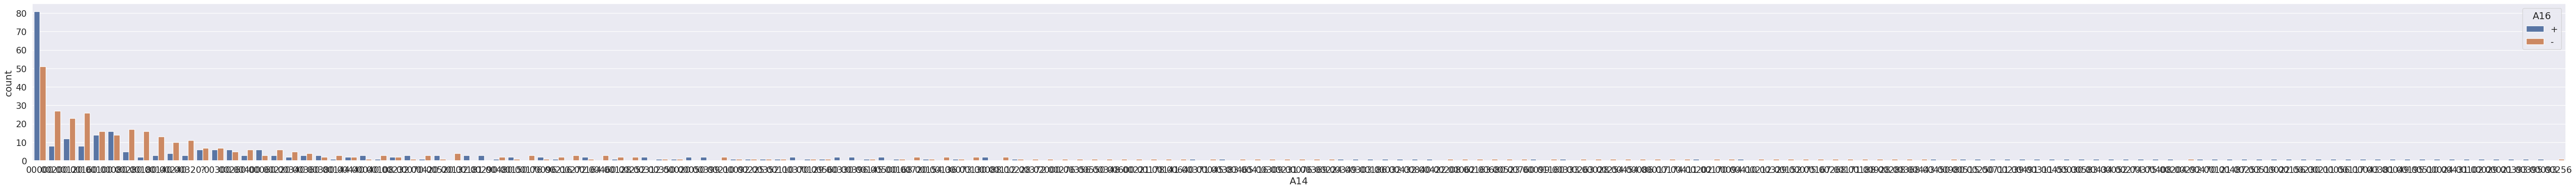

In [ ]:
#Mengkomparasi yang + dengan yang -
plt.subplots(figsize = (80,5))
sns.countplot(x=dataset['A14'],order=dataset['A14'].value_counts().index,hue=dataset['A16'])
plt.show()

### Distribusi Fitur A15

In [ ]:
print(dataset['A15'].value_counts())

0       295
1        29
500      10
1000     10
2         9
       ... 
1704      1
857       1
6700      1
2503      1
750       1
Name: A15, Length: 240, dtype: int64


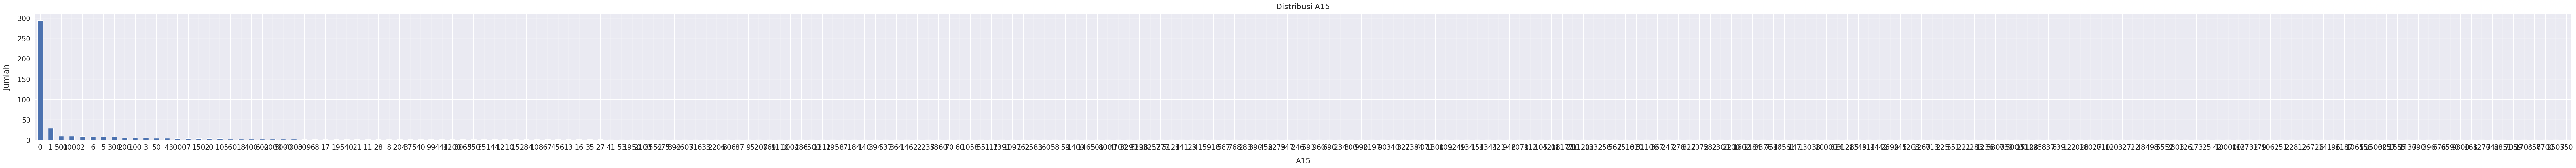

In [ ]:
sns.set(font_scale=1.4)
dataset['A15'].value_counts().plot(kind='bar', figsize=(100, 5), rot=0)
plt.xlabel("A15", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi A15", y=1.02);


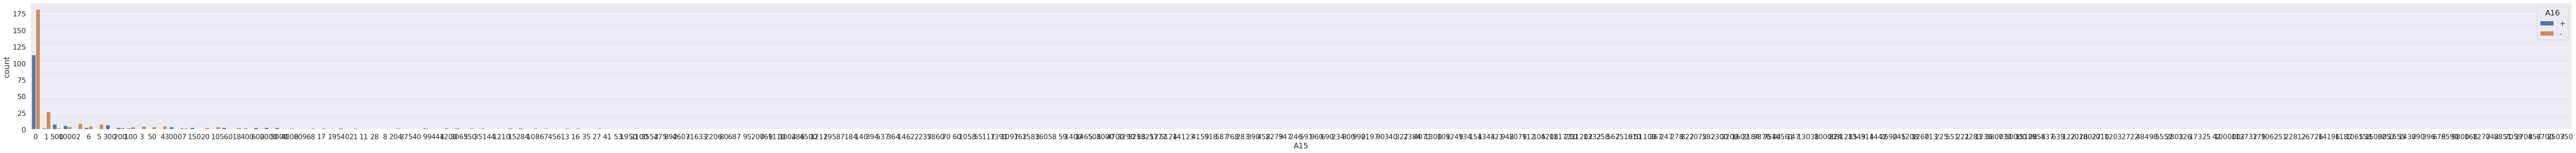

In [ ]:
#Mengkomparasi yang + dengan yang -
plt.subplots(figsize = (100,5))
sns.countplot(x=dataset['A15'],order=dataset['A15'].value_counts().index,hue=dataset['A16'])
plt.show()

# Korelasi Tahap 1

<ipython-input-313-81245cc599f8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()


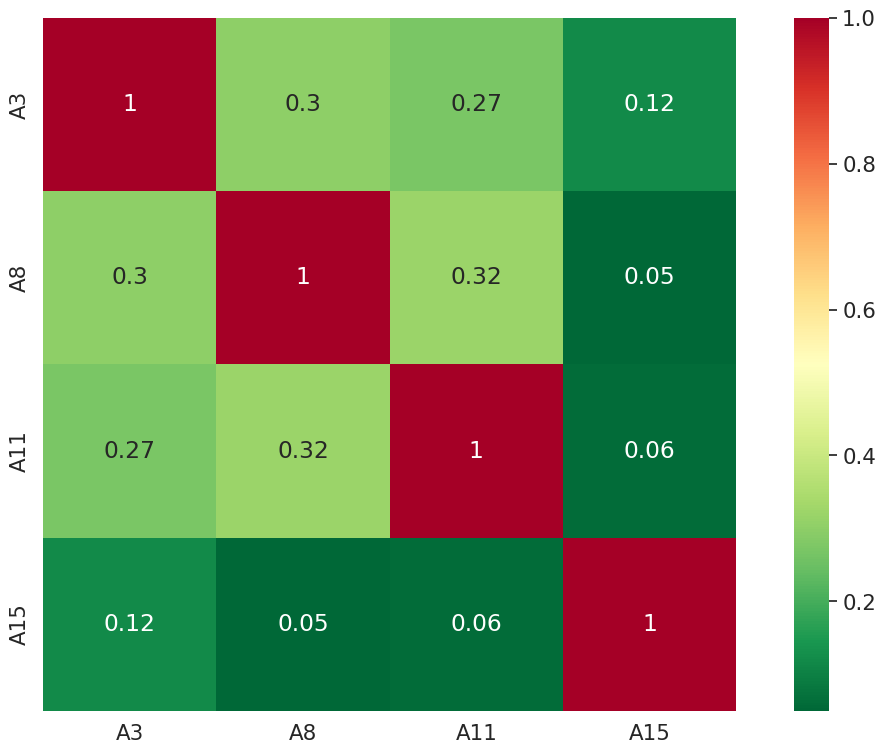

In [ ]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (15,9))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

**temuan:**
 *   terdapat beberapa fitur yang bernilai ?, maka dari itu dapat dikatakan, bahwa ? adalah menandakan nilai yang hilang

*   dan korelasi matrix tidak bekerja sebab tipe data yang tidak tepat, adalah object


# Bab 3 Validasi data

**temuan:**
*  Ternyata masih ada missing value
*  Masih adanya data yang berbentuk objek dan harus dirubah ke dalam bentuk numerik
*  dan atribut tidak keluar (A12,A2,A4,A5,A6,A7,A9,A10,A12,A13,A14,A16)



# Bab 4 Menentukan objek Data

silakan generate table menggunakan https://www.tablesgenerator.com/markdown_tables

**temuan**:

| Nama | Deskripsi |
|------|-----------|
| A16  | Label     |
| A1   | Atribut   |
| A2   | Atribut   |
| A3   | Atribut   |
| A4   | Atribut   |
| A5   | Atribut   |
| A6   | Atribut   |
| A7   | Atribut   |
| A8   | Atribut   |
| A9   | Atribut   |
| A10  | Atribut   |
| A11  | Atribut   |
| A12  | Atribut   |
| A13  | Atribut   |
| A14  | Atribut   |
| A15  | Atribut   |


# Bab 5 Membersihkan Data

### Memperbaiki nilai yang hilang (Data Cleaning)

terdapat nilai yang hilang, ditulis dalam bentuk "?", maka kita rubah menjadi NaN

Merubah tanda ?

In [ ]:
dataset.replace("?", np.nan, inplace= True)

### Cek Bentuk Dataset

In [ ]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
dataset.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


In [ ]:
dataset.describe(include="all")

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,678,678,690.000000,684,684,681,681,690.000000,690,690,690.00000,690,690,677,690.000000,690
unique,2,349,NaN,3,3,14,9,NaN,2,2,NaN,2,3,170,NaN,2
top,b,22.67,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,468,9,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,383
mean,NaN,NaN,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,NaN,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


memperbaiki data yang hilang dan Ditemukan bahwa bentuk "?" telah berubah menjadi NaN

### Memperbaiki Data yang Hilang

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    object 
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [ ]:
dataset.isnull().values.any()

True

In [ ]:
#data ini bisa terjadi karena memiliki ? sehingga dapat dibaca sebagai object
dataset.loc[:, dataset.isnull().any()].columns

Index(['A1', 'A2', 'A4', 'A5', 'A6', 'A7', 'A14'], dtype='object')

In [ ]:
dataset.isna().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
       ..
A12     0
A13     0
A14    13
A15     0
A16     0
Length: 16, dtype: int64

In [ ]:
dataset.loc[:,list(dataset.loc[:,dataset.isnull().any()].columns)].isnull().sum()/(len(dataset))*100

A1     1.739130
A2     1.739130
A4     0.869565
A5     0.869565
A6     1.304348
A7     1.304348
A14    1.884058
dtype: float64

**Temuan:** Ditemukan missing value ternyata pada atribut A1, A2, A4, A5, A6, A7, A14

nah untuk presentase missing value ternyata hanya di rentang 1-2, maka record yang ada missing value tadi akan diganti, tidak dihapus

<Axes: >

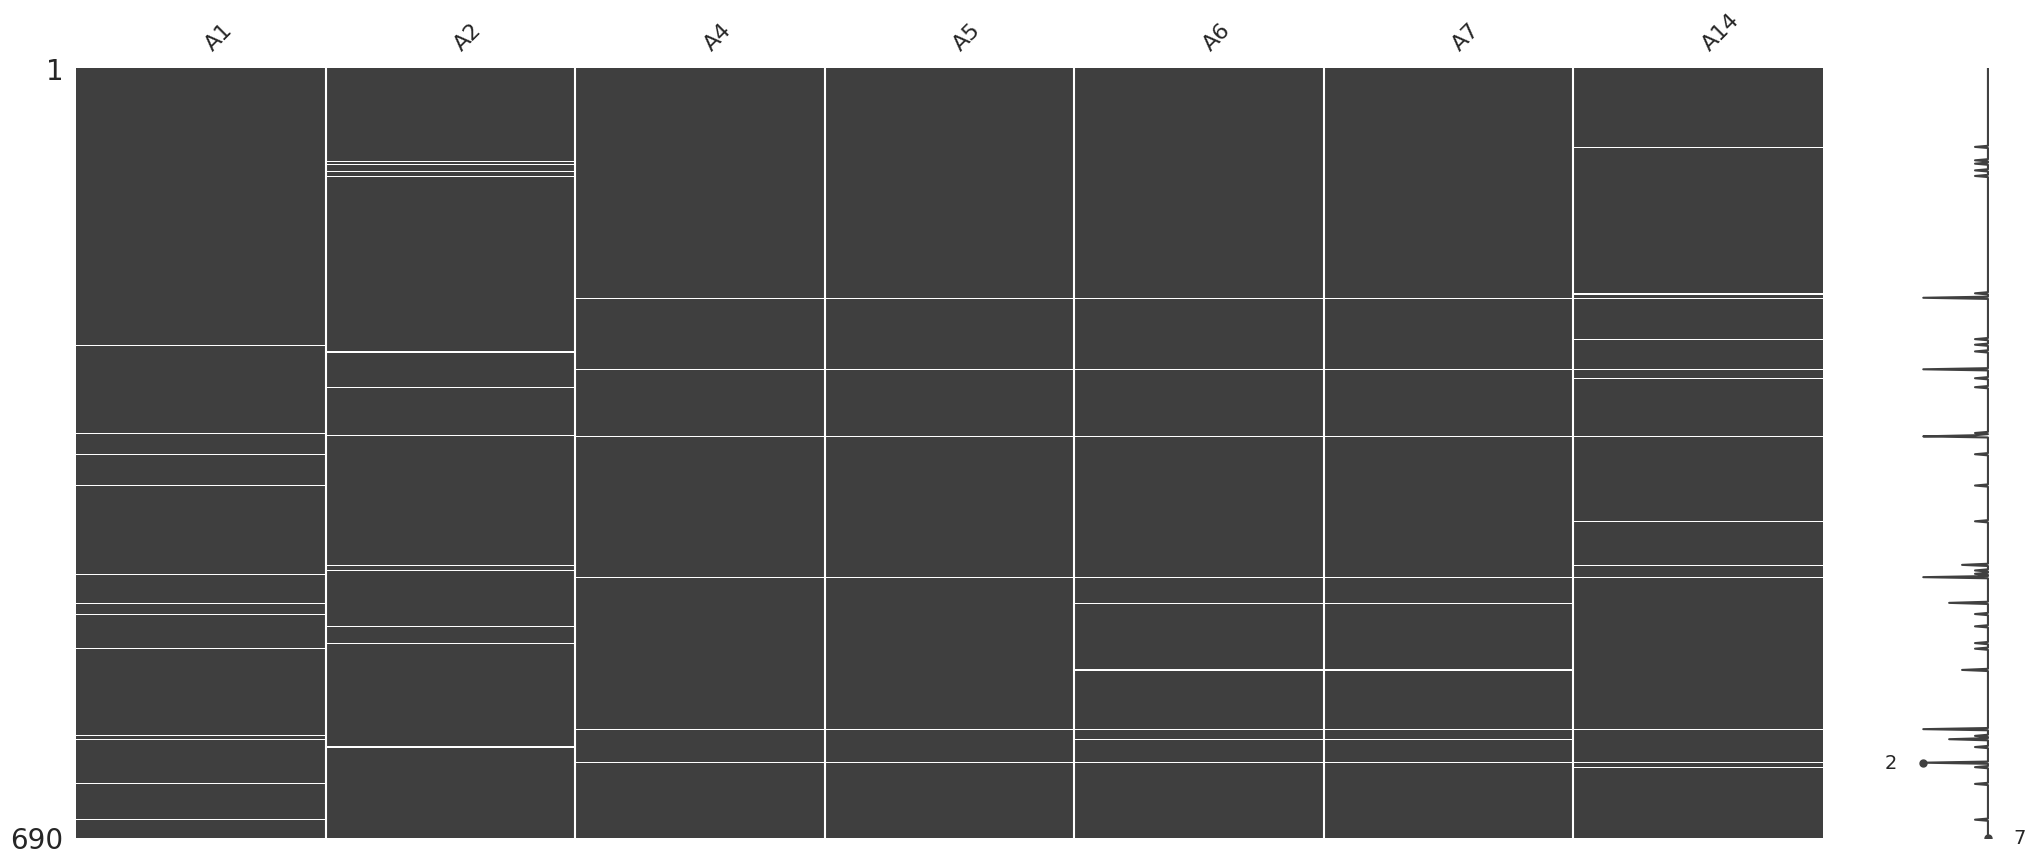

In [ ]:
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

**Diganti sesuai kebutuhan**

In [ ]:
# hapus fitur jika fitur yang hilang lebih dari 50%
# dataset.drop(['fitur'], axis="columns", inplace=True)

In [ ]:
# Perbaikan A1
dataset['A1'].fillna(dataset['A1'].mode()[0], inplace=True)

# Perbaikan A2
dataset['A2'].fillna(value=dataset['A2'].median(), inplace=True)

# Perbaikan A4
dataset['A4'].fillna(dataset['A4'].mode()[0], inplace=True)

# Perbaikan A5
dataset['A5'].fillna(dataset['A5'].mode()[0], inplace=True)

# Perbaikan A6
dataset['A6'].fillna(dataset['A6'].mode()[0], inplace=True)

# Perbaikan A7
dataset['A7'].fillna(dataset['A7'].mode()[0], inplace=True)

# Perbaikan A14
dataset['A14'].fillna(value=dataset['A14'].median(), inplace=True)

Mengecek Kembali

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


**temuan**: dapat dilihat bahwa meskipun sudah diperbaiki, ternyata tipe data ini masih bersifat Object, nah, maka dari itu perlu dirubah menjadi int atau Float. dan untuk menentukannya, perlu melihat distribusi data kembali

# Bab 6 Kontruksi Data

In [ ]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


### Melakukan encoding pada data kategori

dilakukan sesuai kebutuhan

df = sebuah variabel untuk membuat salinan atau duplikasi dari dataset

In [ ]:
df = dataset.copy()

In [ ]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [ ]:
df["A1"] = df["A1"].astype("category")
df["A1"] = df["A1"].cat.codes

df["A4"] = df["A4"].astype("category")
df["A4"] = df["A4"].cat.codes

df["A5"] = df["A5"].astype("category")
df["A5"] = df["A5"].cat.codes

df["A6"] = df["A6"].astype("category")
df["A6"] = df["A6"].cat.codes

df["A7"] = df["A7"].astype("category")
df["A7"] = df["A7"].cat.codes

df["A9"] = df["A9"].astype("category")
df["A9"] = df["A9"].cat.codes

df["A10"] = df["A10"].astype("category")
df["A10"] = df["A10"].cat.codes

df["A12"] = df["A12"].astype("category")
df["A12"] = df["A12"].cat.codes

df["A13"] = df["A13"].astype("category")
df["A13"] = df["A13"].cat.codes

df["A16"] = df["A16"].astype("category")
df["A16"] = df["A16"].cat.codes

In [ ]:
#df = pd.get_dummies(df, columns=["A6", "A7"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int8   
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    int8   
 4   A5      690 non-null    int8   
 5   A6      690 non-null    int8   
 6   A7      690 non-null    int8   
 7   A8      690 non-null    float64
 8   A9      690 non-null    int8   
 9   A10     690 non-null    int8   
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int8   
 12  A13     690 non-null    int8   
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    int8   
dtypes: float64(2), int64(2), int8(10), object(2)
memory usage: 39.2+ KB


In [ ]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,00202,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,00043,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,00280,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,00100,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,00120,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,4,3,1.25,0,0,0,0,0,00260,0,1
686,0,22.67,0.750,1,0,1,7,2.00,0,1,2,1,0,00200,394,1
687,0,25.25,13.500,2,2,5,2,2.00,0,1,1,1,0,00200,1,1
688,1,17.92,0.205,1,0,0,7,0.04,0,0,0,0,0,00280,750,1


### Mengubah Tipe Data

In [ ]:
df['A2'] = df['A2'].astype(str).astype(float)
df['A14'] = df['A14'].astype(str).astype(float)

In [ ]:
df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,1.233333,0.475362,5.698551,5.098551,2.223406,0.523188,0.427536,2.40000,0.457971,0.176812,183.562319,1017.385507,0.555072
std,0.460464,11.860245,4.978163,0.430063,0.850238,4.285748,2.510731,3.346513,0.499824,0.495080,4.86294,0.498592,0.557869,172.190278,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,0.000000,1.000000,3.000000,0.165000,0.000000,0.000000,0.00000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,0.000000,5.000000,7.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,160.000000,5.000000,1.000000
75%,1.000000,37.707500,7.207500,1.000000,0.000000,10.000000,7.000000,2.625000,1.000000,1.000000,3.00000,1.000000,0.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,2.000000,2.000000,13.000000,8.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2.000000,2000.000000,100000.000000,1.000000


### Menghapus Nilai yang Bernilai Konstan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int8   
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int8   
 4   A5      690 non-null    int8   
 5   A6      690 non-null    int8   
 6   A7      690 non-null    int8   
 7   A8      690 non-null    float64
 8   A9      690 non-null    int8   
 9   A10     690 non-null    int8   
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int8   
 12  A13     690 non-null    int8   
 13  A14     690 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    int8   
dtypes: float64(4), int64(2), int8(10)
memory usage: 39.2 KB


In [ ]:
df = df.loc[:,df.apply(pd.Series.nunique) != 1]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int8   
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int8   
 4   A5      690 non-null    int8   
 5   A6      690 non-null    int8   
 6   A7      690 non-null    int8   
 7   A8      690 non-null    float64
 8   A9      690 non-null    int8   
 9   A10     690 non-null    int8   
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int8   
 12  A13     690 non-null    int8   
 13  A14     690 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    int8   
dtypes: float64(4), int64(2), int8(10)
memory usage: 39.2 KB


### Mencek Korelasi

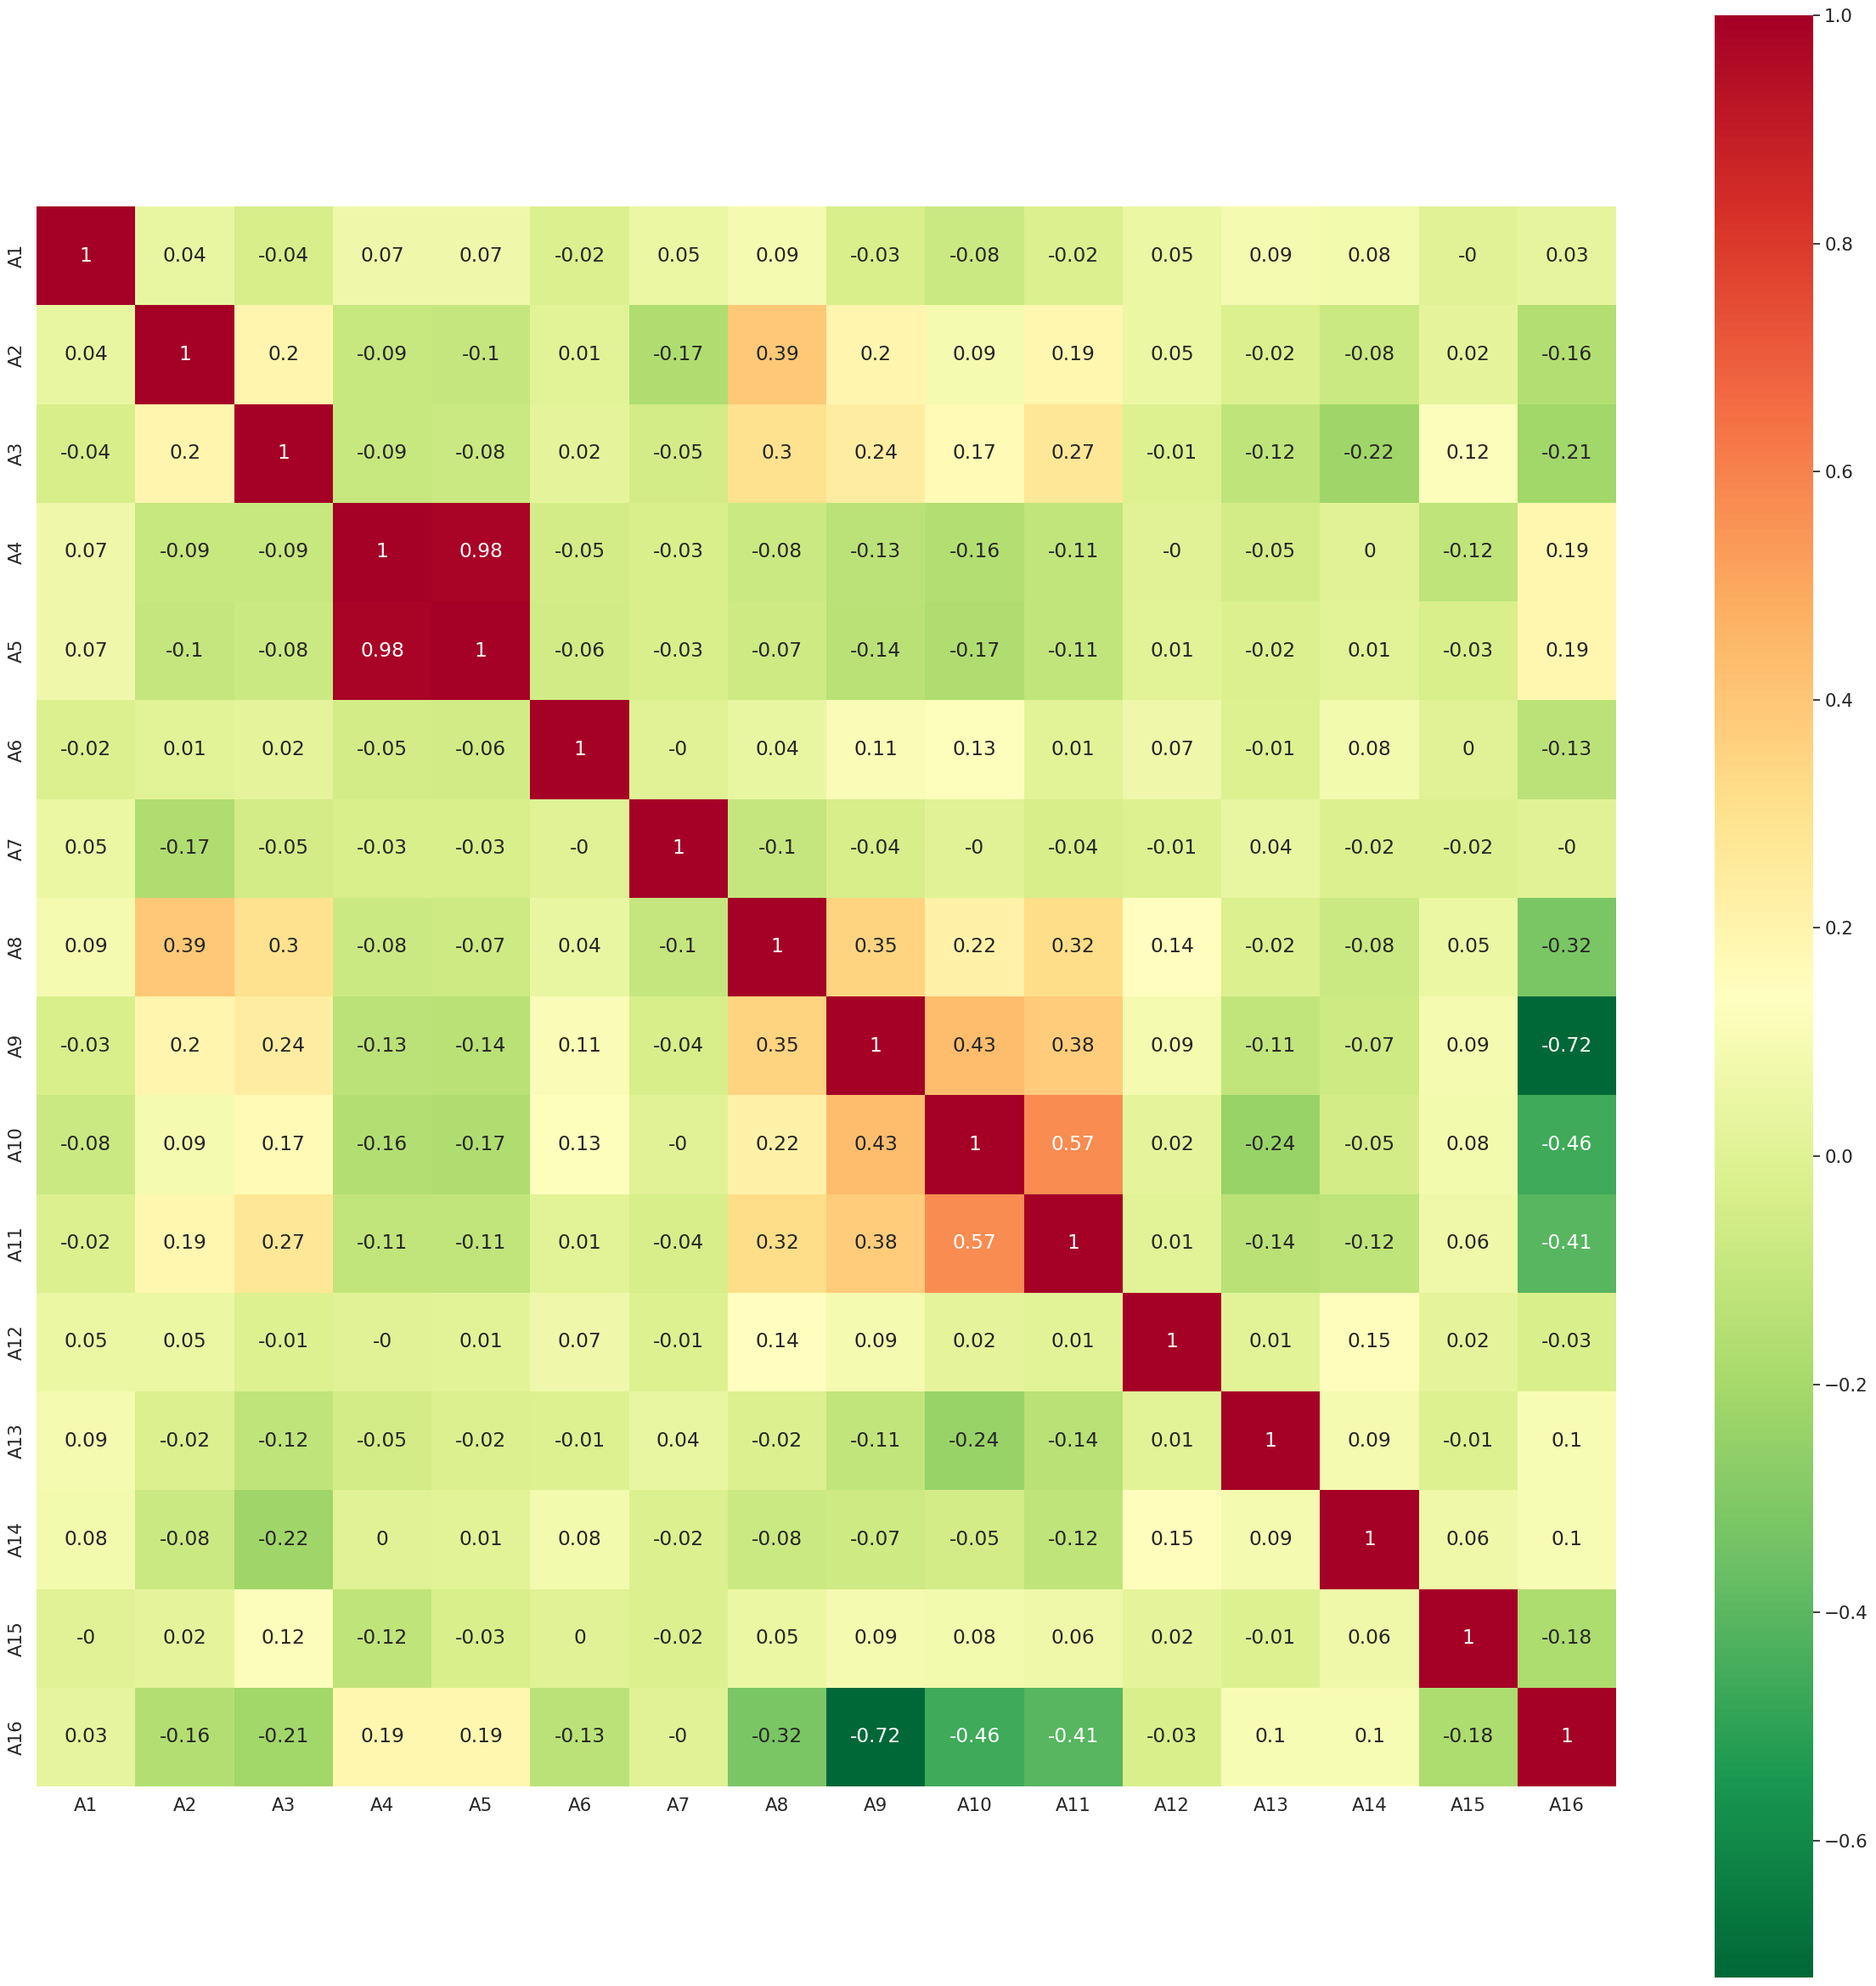

In [ ]:
# Correlation Heatmap
correlation = df.corr()
plt.subplots(figsize = (30,30))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

### Cek Boxplot

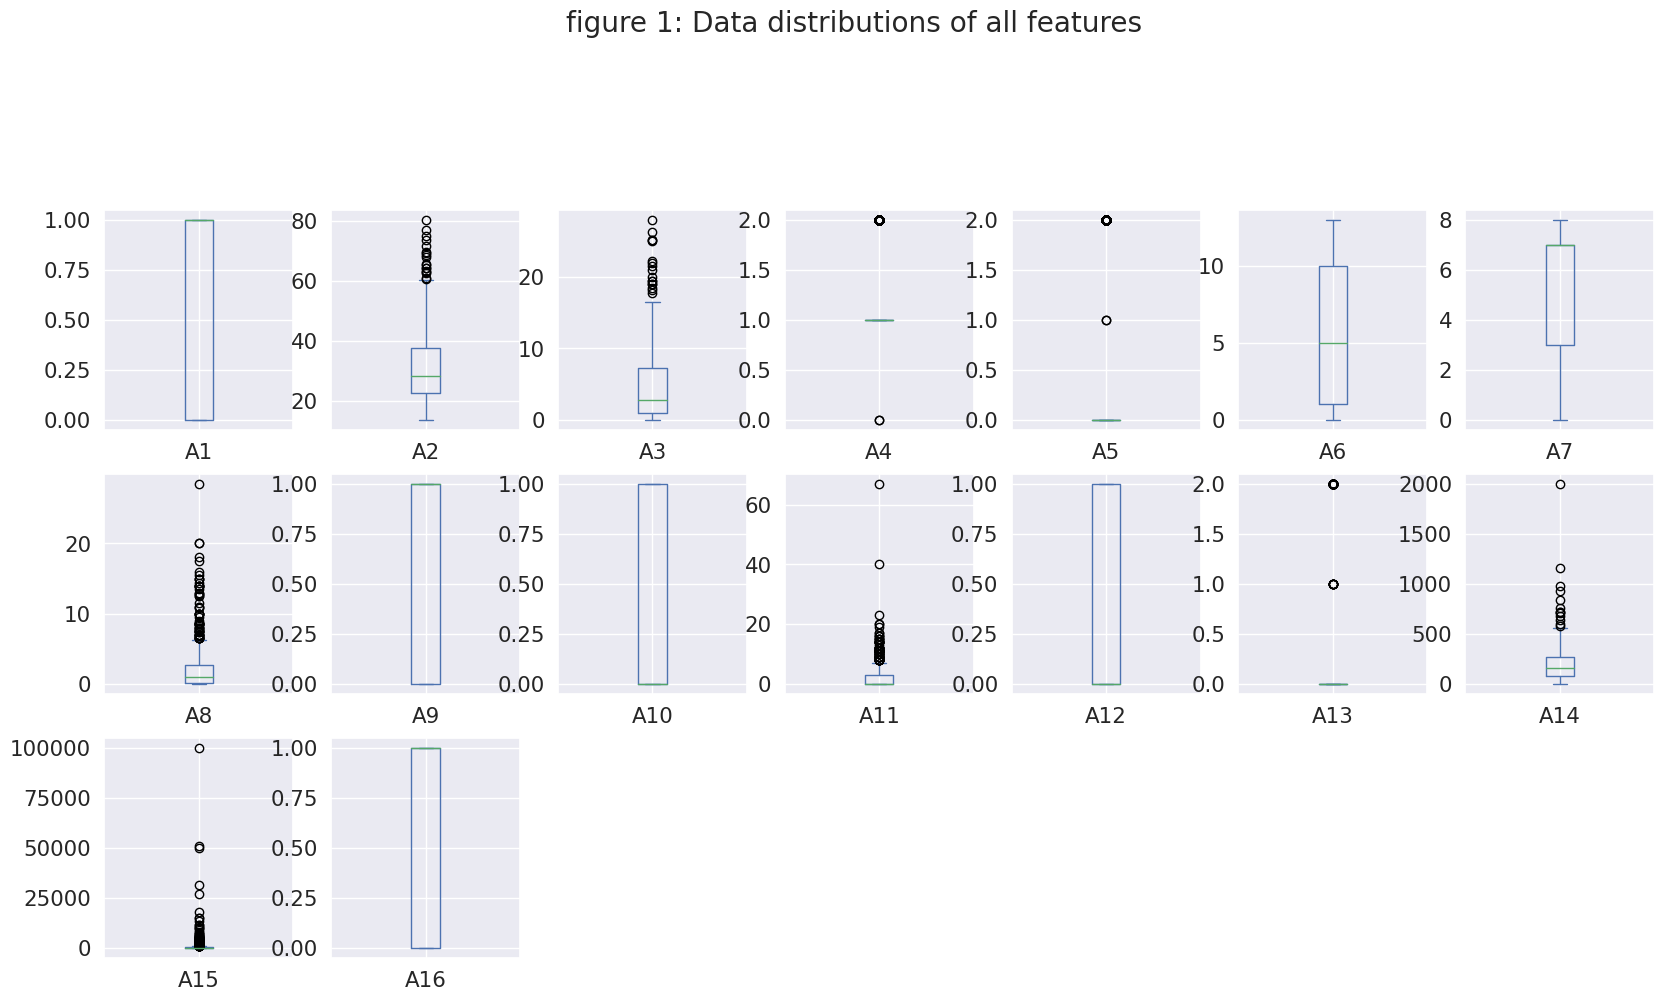

In [ ]:
df.plot(kind='box',subplots=True,layout=(6,7), sharex=False,figsize = (20,20),
                           title='figure 1: Data distributions of all features')
plt.show()

**Temuan:** adanya outlier, tetapi asesi pada ini tidak perlu melakukan perbaikan nilai outlier

# Bab 7 Menentukan Label Data

In [ ]:
y = df['A16']

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
685    1
686    1
687    1
688    1
689    1
Name: A16, Length: 690, dtype: int8

In [ ]:
X = df.drop(['A16'], 1)

<ipython-input-343-3a593e81668a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop(['A16'], 1)


In [ ]:
X

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,4,3,1.25,0,0,0,0,0,260.0,0
686,0,22.67,0.750,1,0,1,7,2.00,0,1,2,1,0,200.0,394
687,0,25.25,13.500,2,2,5,2,2.00,0,1,1,1,0,200.0,1
688,1,17.92,0.205,1,0,0,7,0.04,0,0,0,0,0,280.0,750


<img src="https://live.staticflickr.com/65535/52438712492_4827412d72_o.png" width="923" height="228" alt="gb1 (1)">

### Perlakuan Data Original

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.4, random_state=42)

### Perlakuan Data Normalisasi

In [ ]:
X_norm = StandardScaler().fit_transform(X)

In [ ]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm,y, test_size=0.4, random_state=42)

# Bab 8 Membangun Model

### Dengan Menggunakan Model Decision Tree

In [ ]:
parameters_dt = {
                "model__max_depth": np.arange(1,10),
                "model__min_samples_leaf": np.arange(1,20,2),
                "model__min_samples_split": np.arange(2,10),
                "model__criterion": ['gini','entropy'],
                "model__random_state": [42]
}

In [ ]:
classifier_dt_pipeline = Pipeline([
                          ('model',DecisionTreeClassifier())
                          ])

#### Pemodelan Data Original

In [ ]:
ori_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=2, n_jobs=-1)

In [ ]:
ori_classifier_dt.fit(X_train,Y_train.ravel())

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'model__min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__random_state': [42]})

In [ ]:
ori_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=1, random_state=42))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 1
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 42


#### Pemodelan Data Normalisasi

In [ ]:
norm_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=2, n_jobs=-1)

In [ ]:
norm_classifier_dt.fit(X_train_norm,Y_train_norm.ravel())

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'model__min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__random_state': [42]})

In [ ]:
norm_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=1, random_state=42))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,norm_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 1
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 42


# Bab 9 Evaluasi Hasil Pemodelan

### Evaluasi Data Original

In [ ]:
ori_y_pred_dt_train = ori_classifier_dt.predict(X_train)

ori_accuracy_dt_train = accuracy_score(Y_train,ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)

ori_precision_dt_train = precision_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)

ori_recall_dt_train = recall_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)

ori_y_pred_dt_test = ori_classifier_dt.predict(X_test)

ori_accuracy_dt_test = accuracy_score(Y_test,ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)

ori_precision_dt_test = precision_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)

ori_recall_dt_test = recall_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)

Akurasi pada training set:  0.8599033816425121
Precision pada training set:  0.8599033816425121
Recall pada training set:  0.8599033816425121
Akurasi pada test set:  0.8478260869565217
Precision pada test set:  0.8478260869565217
Recall pada test set:  0.8478260869565217


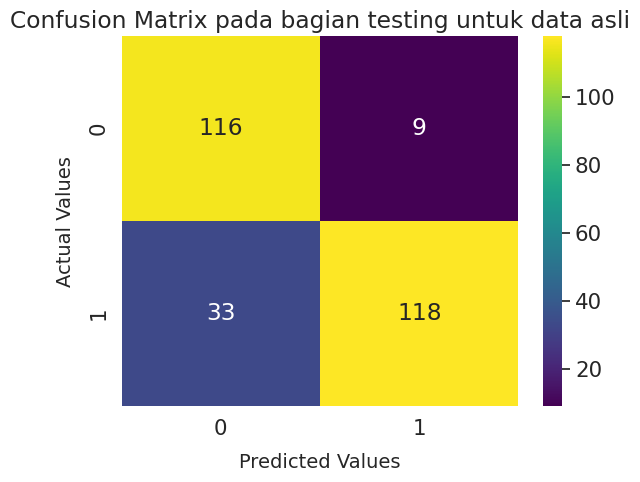

In [ ]:
sns.heatmap(confusion_matrix(Y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

### Evaluasi Data Normalisasi

In [ ]:
norm_y_pred_dt_train = norm_classifier_dt.predict(X_train_norm)

norm_accuracy_dt_train = accuracy_score(Y_train_norm,norm_y_pred_dt_train)
print('Akurasi pada training set: ', norm_accuracy_dt_train)

norm_precision_dt_train = precision_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_precision_dt_train)

norm_recall_dt_train = recall_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_recall_dt_train)

norm_y_pred_dt_test = norm_classifier_dt.predict(X_test_norm)

norm_accuracy_dt_test = accuracy_score(Y_test_norm,norm_y_pred_dt_test)
print('Akurasi pada test set: ', norm_accuracy_dt_test)

norm_precision_dt_test = precision_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_precision_dt_test)

norm_recall_dt_test = recall_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_recall_dt_test)

Akurasi pada training set:  0.8599033816425121
Precision pada training set:  0.8599033816425121
Recall pada training set:  0.8599033816425121
Akurasi pada test set:  0.8478260869565217
Precision pada test set:  0.8478260869565217
Recall pada test set:  0.8478260869565217


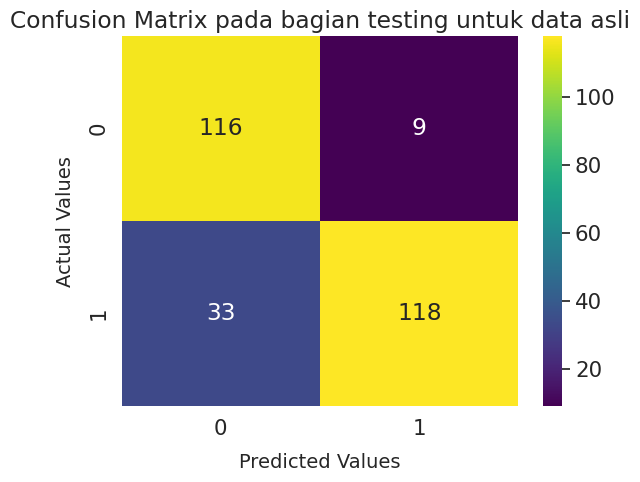

In [ ]:
sns.heatmap(confusion_matrix(Y_test_norm,norm_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

In [ ]:
models = [
          ('Machine Learning Data Original', ori_accuracy_dt_train, ori_accuracy_dt_test),
          ('Machine Learning Data Normalisasi', norm_accuracy_dt_train, norm_accuracy_dt_test),

         ]

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Machine Learning Data Original,0.859903,0.847826
1,Machine Learning Data Normalisasi,0.859903,0.847826


In [ ]:
models_comparison = [
                        ('Machine Learning Data Original', ori_accuracy_dt_test, ori_recall_dt_test, ori_precision_dt_test),
                        ('Machine Learning Data Normalisasi', norm_accuracy_dt_test, norm_recall_dt_test, norm_precision_dt_test),

                    ]

In [ ]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Machine Learning Data Original,0.847826,0.847826,0.847826
1,Machine Learning Data Normalisasi,0.847826,0.847826,0.847826


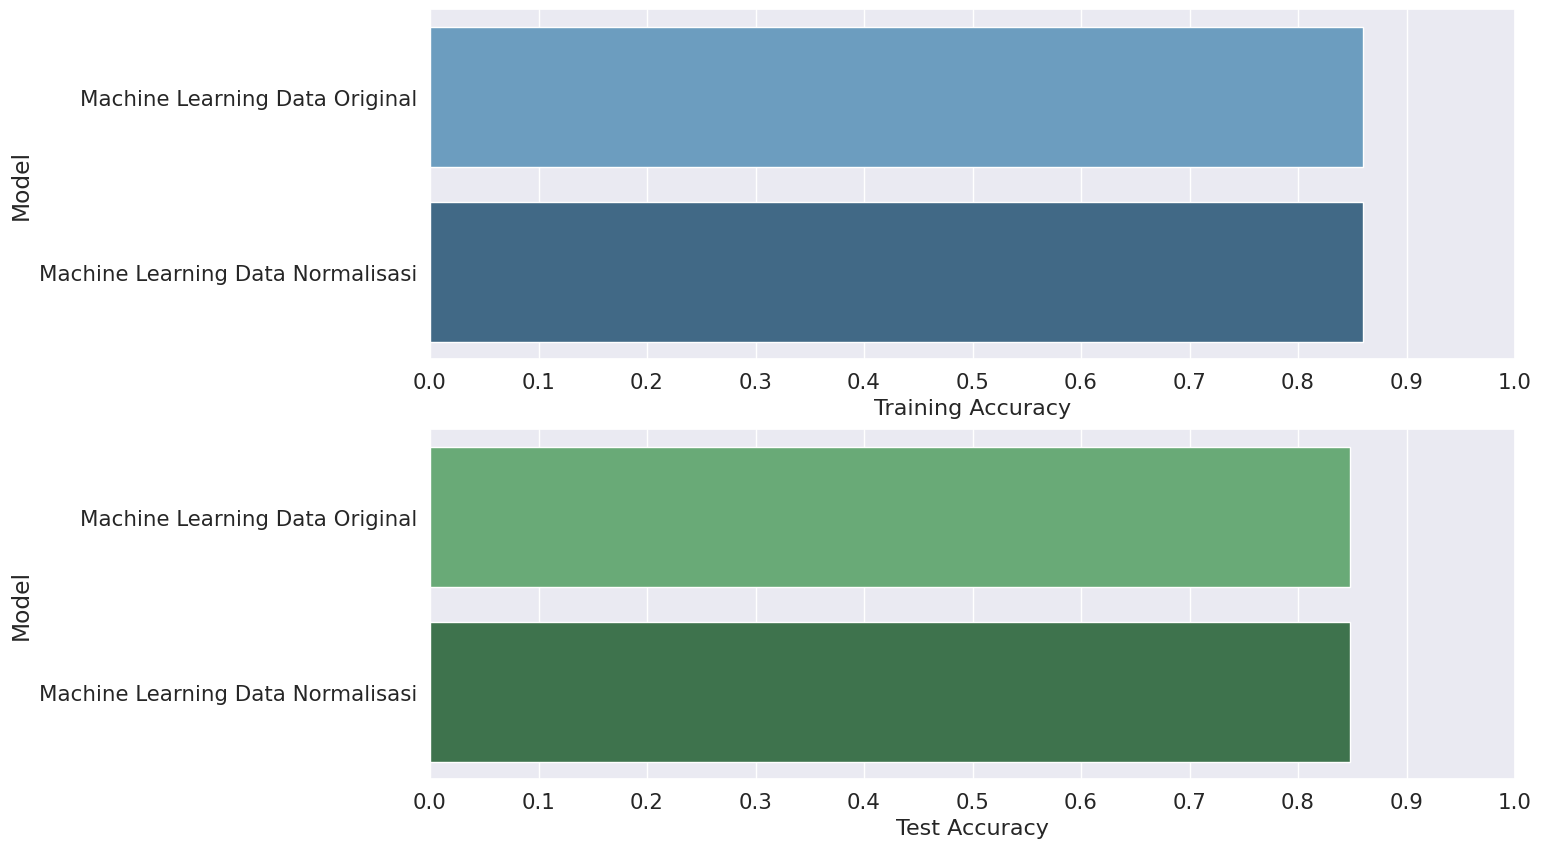

In [ ]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

### Hasil terbaik akan dilihat Tree nya (Studi Kasus Machine Learning data original)

In [ ]:
from sklearn import tree

In [ ]:
# feature_importances = ori_classifier_dt.best_estimator_.named_steps["model"].feature_importances_
# feature_importances

In [ ]:
def Analize_Feature(model,X_test):
    aux_dic = {'name':[],'coef':[]}
    pd.set_option('display.max_rows',len(X_test.columns))
    for name, importance in zip(X_test.columns,model.best_estimator_.named_steps["model"].feature_importances_):
        aux_dic['name'].append(name)
        aux_dic['coef'].append(importance)
        df_features_importance = pd.DataFrame(aux_dic)
    print(df_features_importance.sort_values(by='coef',ascending=False))
    return df_features_importance
Analize_Feature(ori_classifier_dt,X_test)

   name  coef
8    A9   1.0
0    A1   0.0
1    A2   0.0
2    A3   0.0
3    A4   0.0
4    A5   0.0
5    A6   0.0
6    A7   0.0
7    A8   0.0
9   A10   0.0
10  A11   0.0
11  A12   0.0
12  A13   0.0
13  A14   0.0
14  A15   0.0


,name,coef
0,A1,0.0
1,A2,0.0
2,A3,0.0
3,A4,0.0
4,A5,0.0
5,A6,0.0
6,A7,0.0
7,A8,0.0
8,A9,1.0
9,A10,0.0


In [ ]:
# tree.plot_tree(ori_classifier_dt.best_estimator_.named_steps["model"])

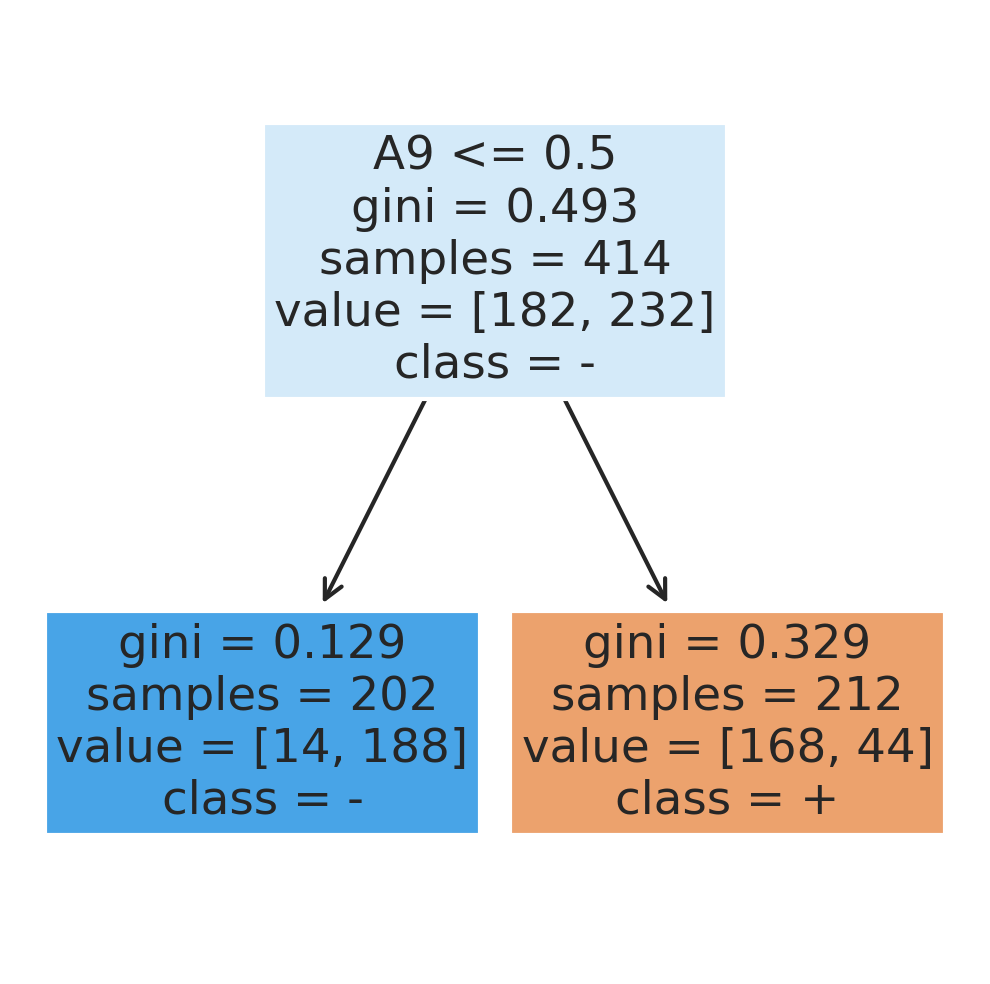

In [ ]:
fn=["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15"]
cn=['+', '-']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(ori_classifier_dt.best_estimator_.named_steps["model"],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

**Temuan:** cara membacanya adalah,,
Jika Bilirubin <=2.45 maka ke node kiri, selain itu ke kanan.

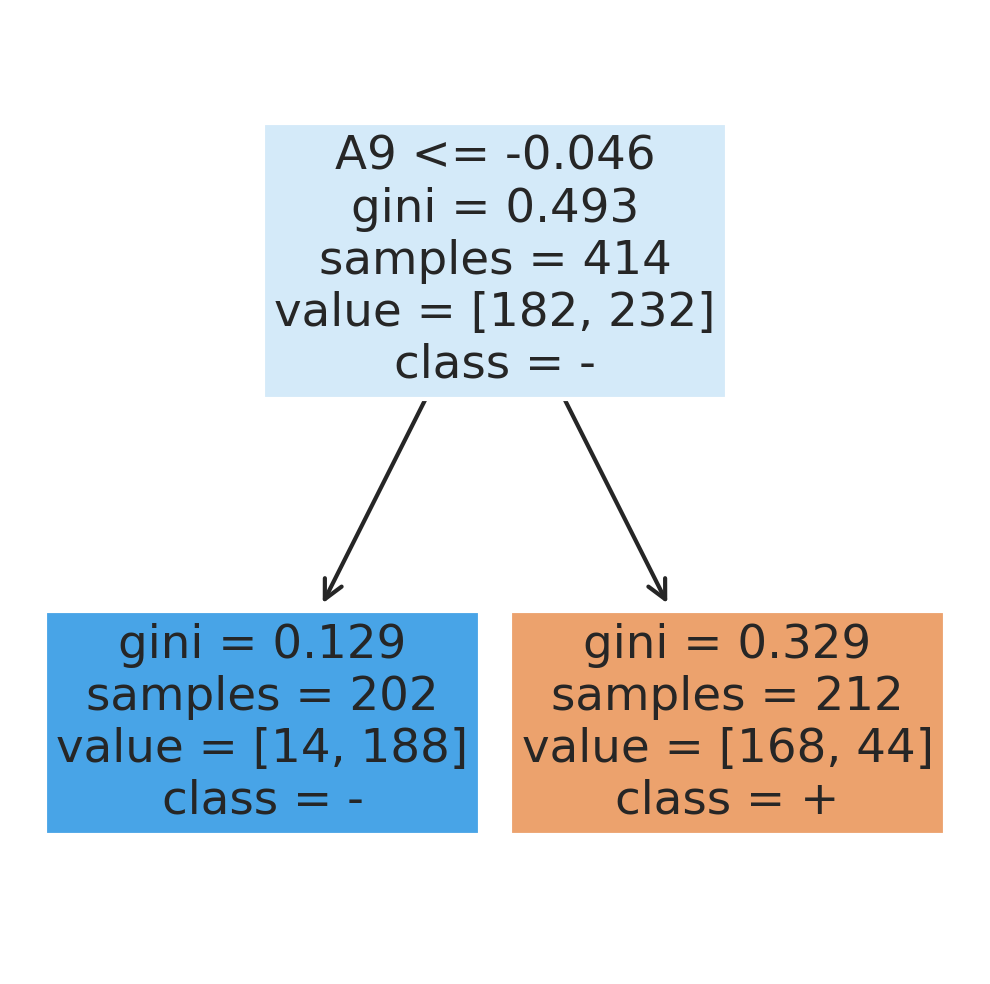

In [ ]:
fn=["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15"]
cn=['+', '-']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(norm_classifier_dt.best_estimator_.named_steps["model"],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')